In [40]:
import matplotlib.pyplot as plt
import pandas as pd
from plotnine import ggplot, aes, geom_point, geom_line, facet_wrap, labs
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [41]:
# Read data from the file and store it in a list
data = []
with open('C:/Users/Cem/Documents/GitHub/Helmholtz-Workspace/Data-Descriptor/Cell-Level/scPower-wrapper/results/muscle/skeletal muscle/estimates_trimmed.txt', 'r') as file:
    for line in file:
        if line.strip():  # Ignore empty lines
            parts = line.strip().split()  # split by space
            if len(parts) == 2:  # check if there are two parts
                counted = int(parts[0])
                estimated = int(parts[1].replace(',', ''))  # remove the comma from the second part
                data.append((counted, estimated))

In [42]:
# Fill a list with the data dictionaries and corresponding labels
labels = ['Complete', 'Subsampled75', 'Subsampled50', 'Subsampled25']
data_entries = []
for i in range(0, len(data), 4):
    for j in range(4):  # grouping in sets of 4
        if i + j < len(data):  # Check if the index is within the range of the data list
            label = labels[j]
            data_entries.append({'Counted': data[i + j][0], 'Estimated': data[i + j][1], 'Label': label})

In [43]:
# Create a DataFrame to hold the data using pd.concat
df = pd.DataFrame(data_entries)

# Convert to numeric and handle non-numeric data
df['Counted'] = pd.to_numeric(df['Counted'], errors='coerce')
df['Estimated'] = pd.to_numeric(df['Estimated'], errors='coerce')
df = df.dropna()

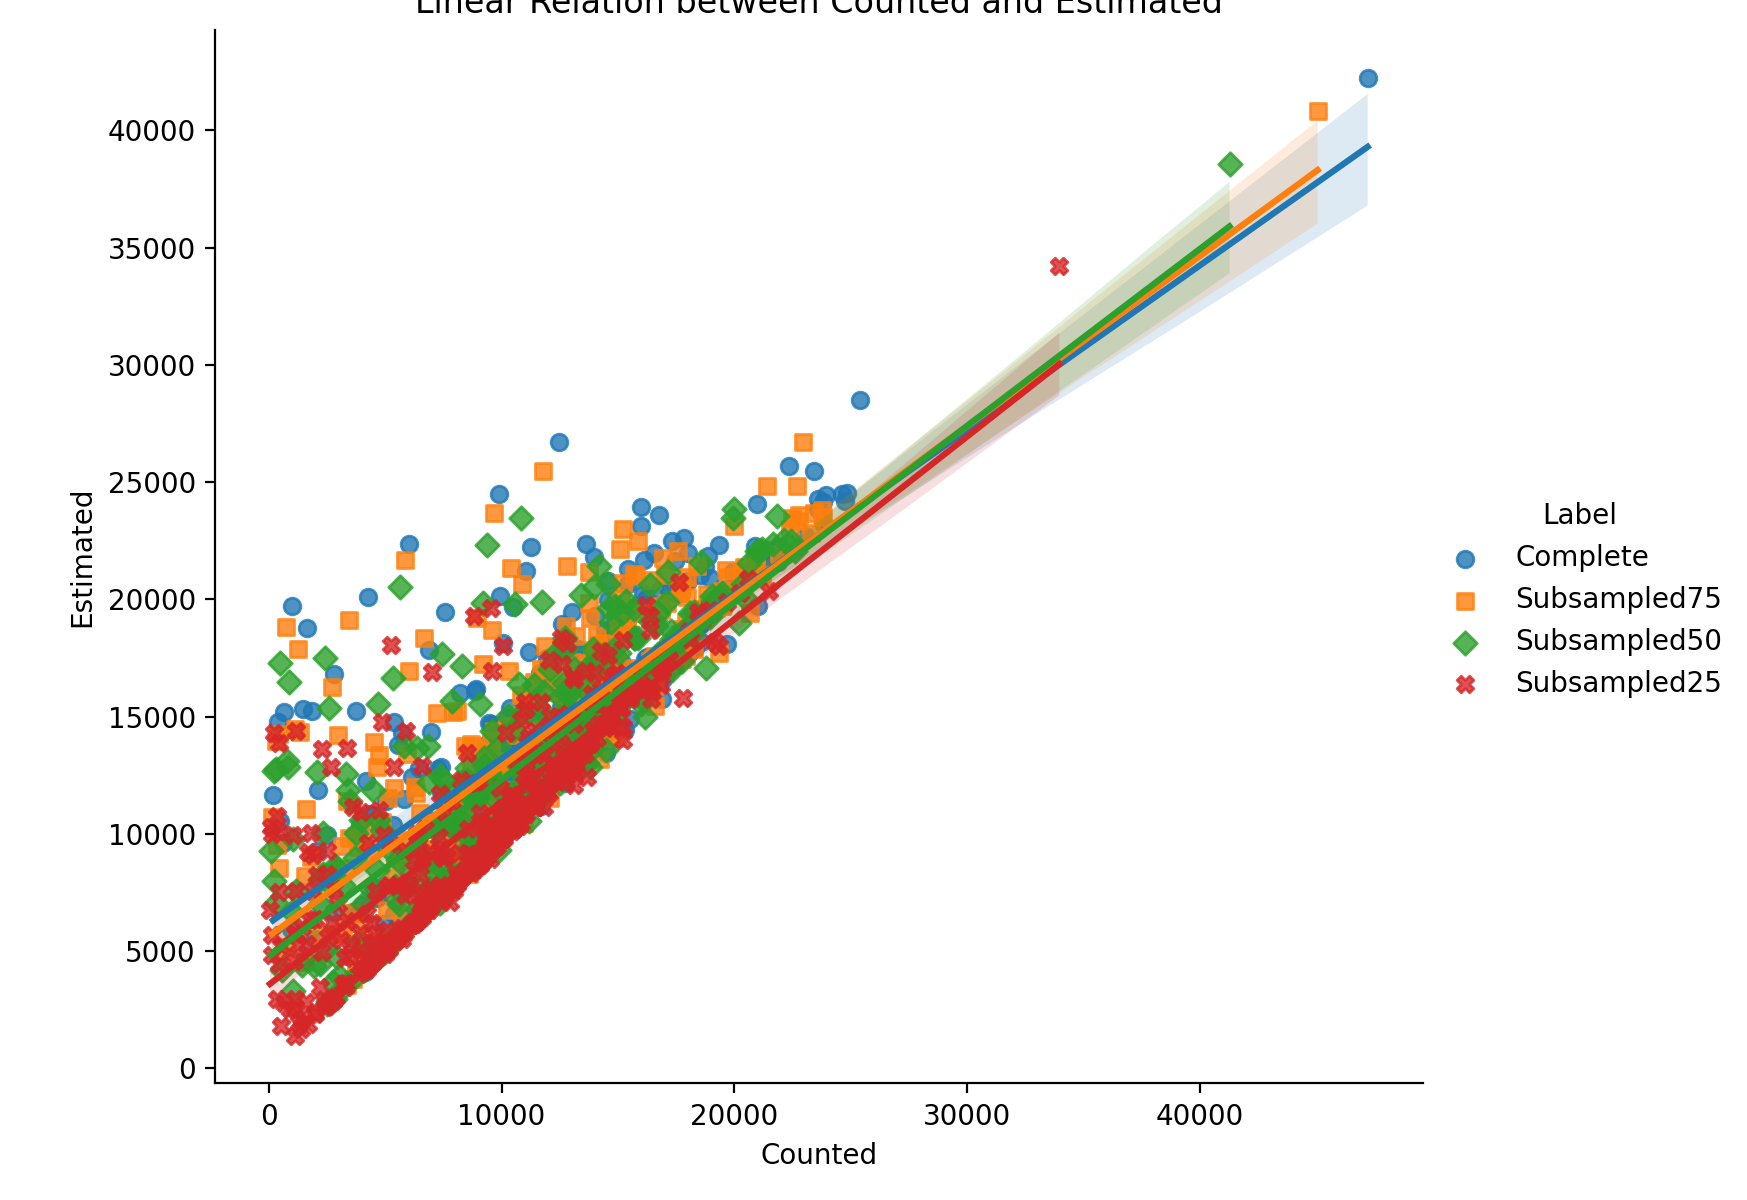

In [44]:
sns.lmplot(x='Counted', y='Estimated', data=df, hue='Label', markers=['o', 's', 'D', 'X'], height=6, aspect=1.2)
plt.title('Linear Relation between Counted and Estimated')
plt.show()

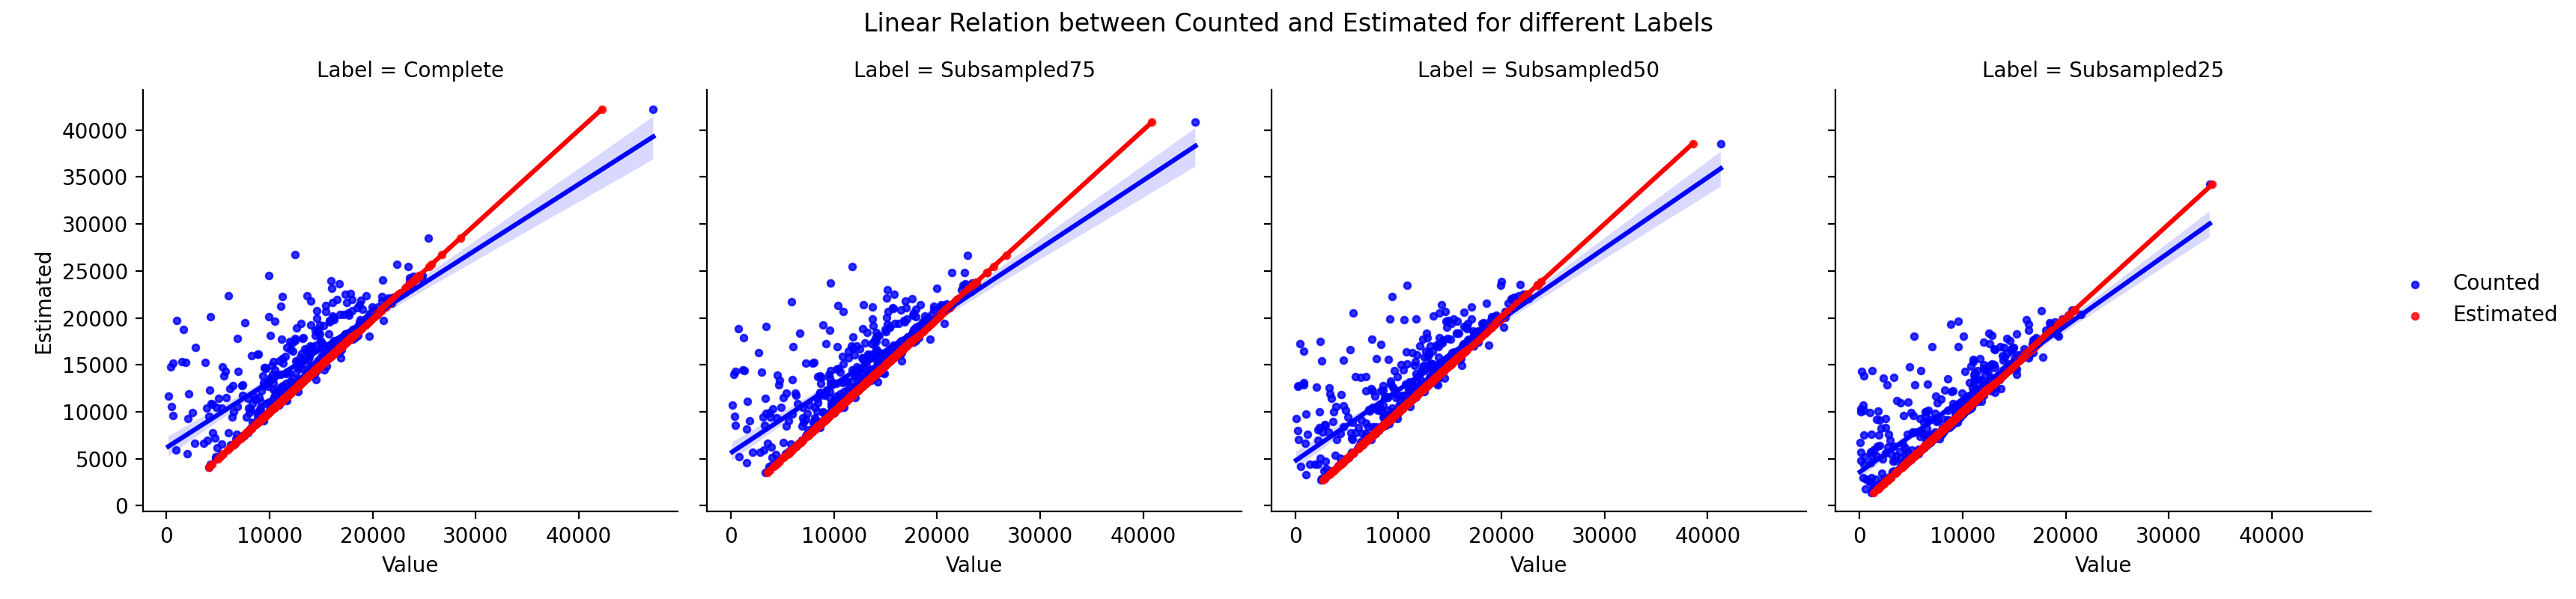

In [45]:
# blue line: linear regression line fitted to the scatter plot of 'Counted' against 'Estimated'
# red line: one to one relation between estimated and estimated which obviously will end up as perfectly diagonal line

# Create a grid of plots with the 'Label' as a separator and plot 'Counted' and 'Estimated' as different linear lines
g = sns.FacetGrid(df, col="Label", height=4, aspect=1)
g.map(sns.regplot, "Counted", "Estimated", color='b', label='Counted', scatter_kws={'s': 10})
g.map(sns.regplot, "Estimated", "Estimated", color='r', label='Estimated', scatter_kws={'s': 10})

# Adding legends and titles
g.add_legend()
g.set_axis_labels("Value", "Estimated")
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Linear Relation between Counted and Estimated for different Labels')

plt.show()



# histogram of percentage difference
# extreme ones
# across dataset

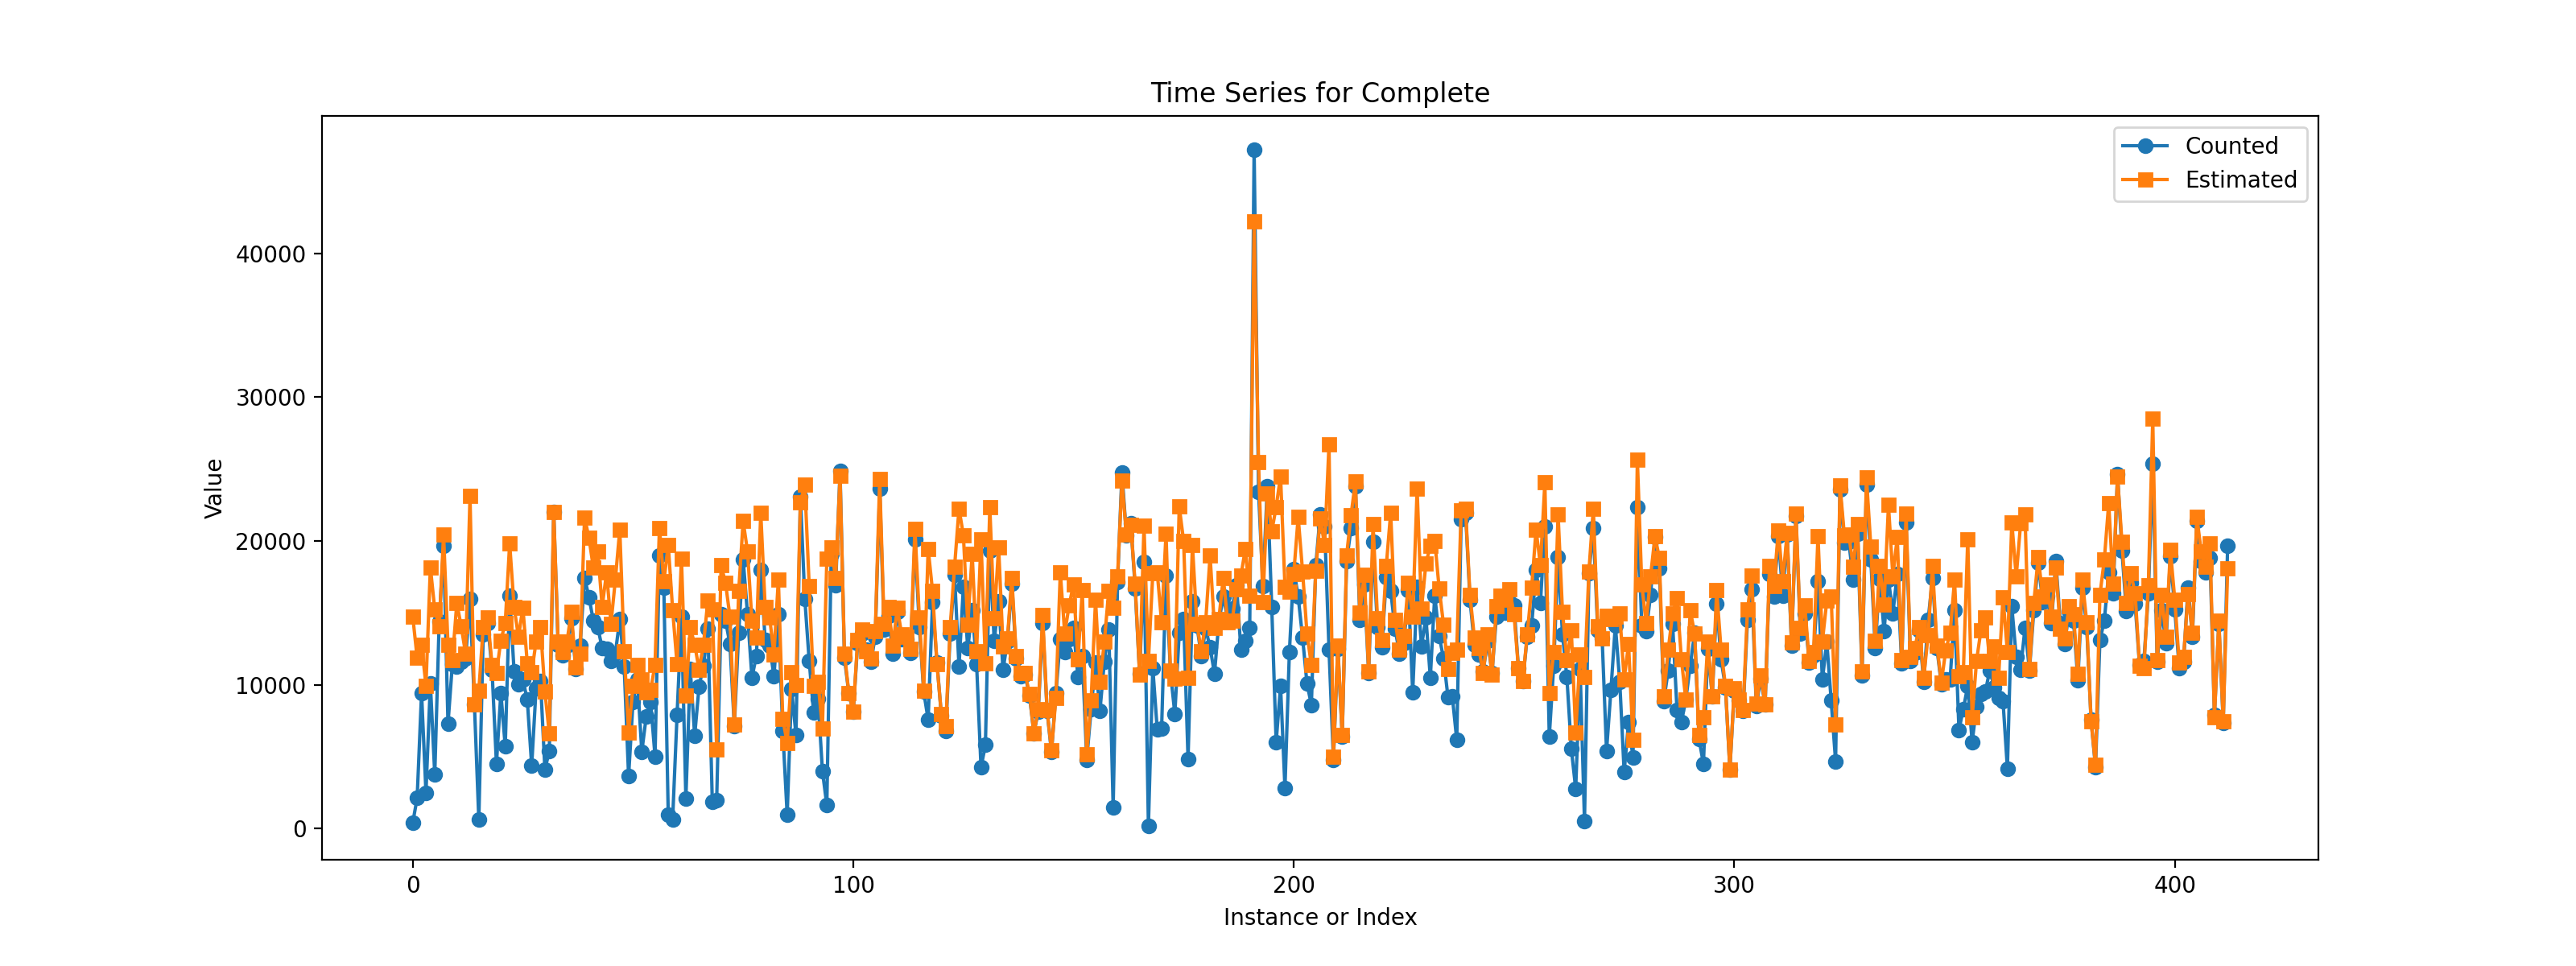

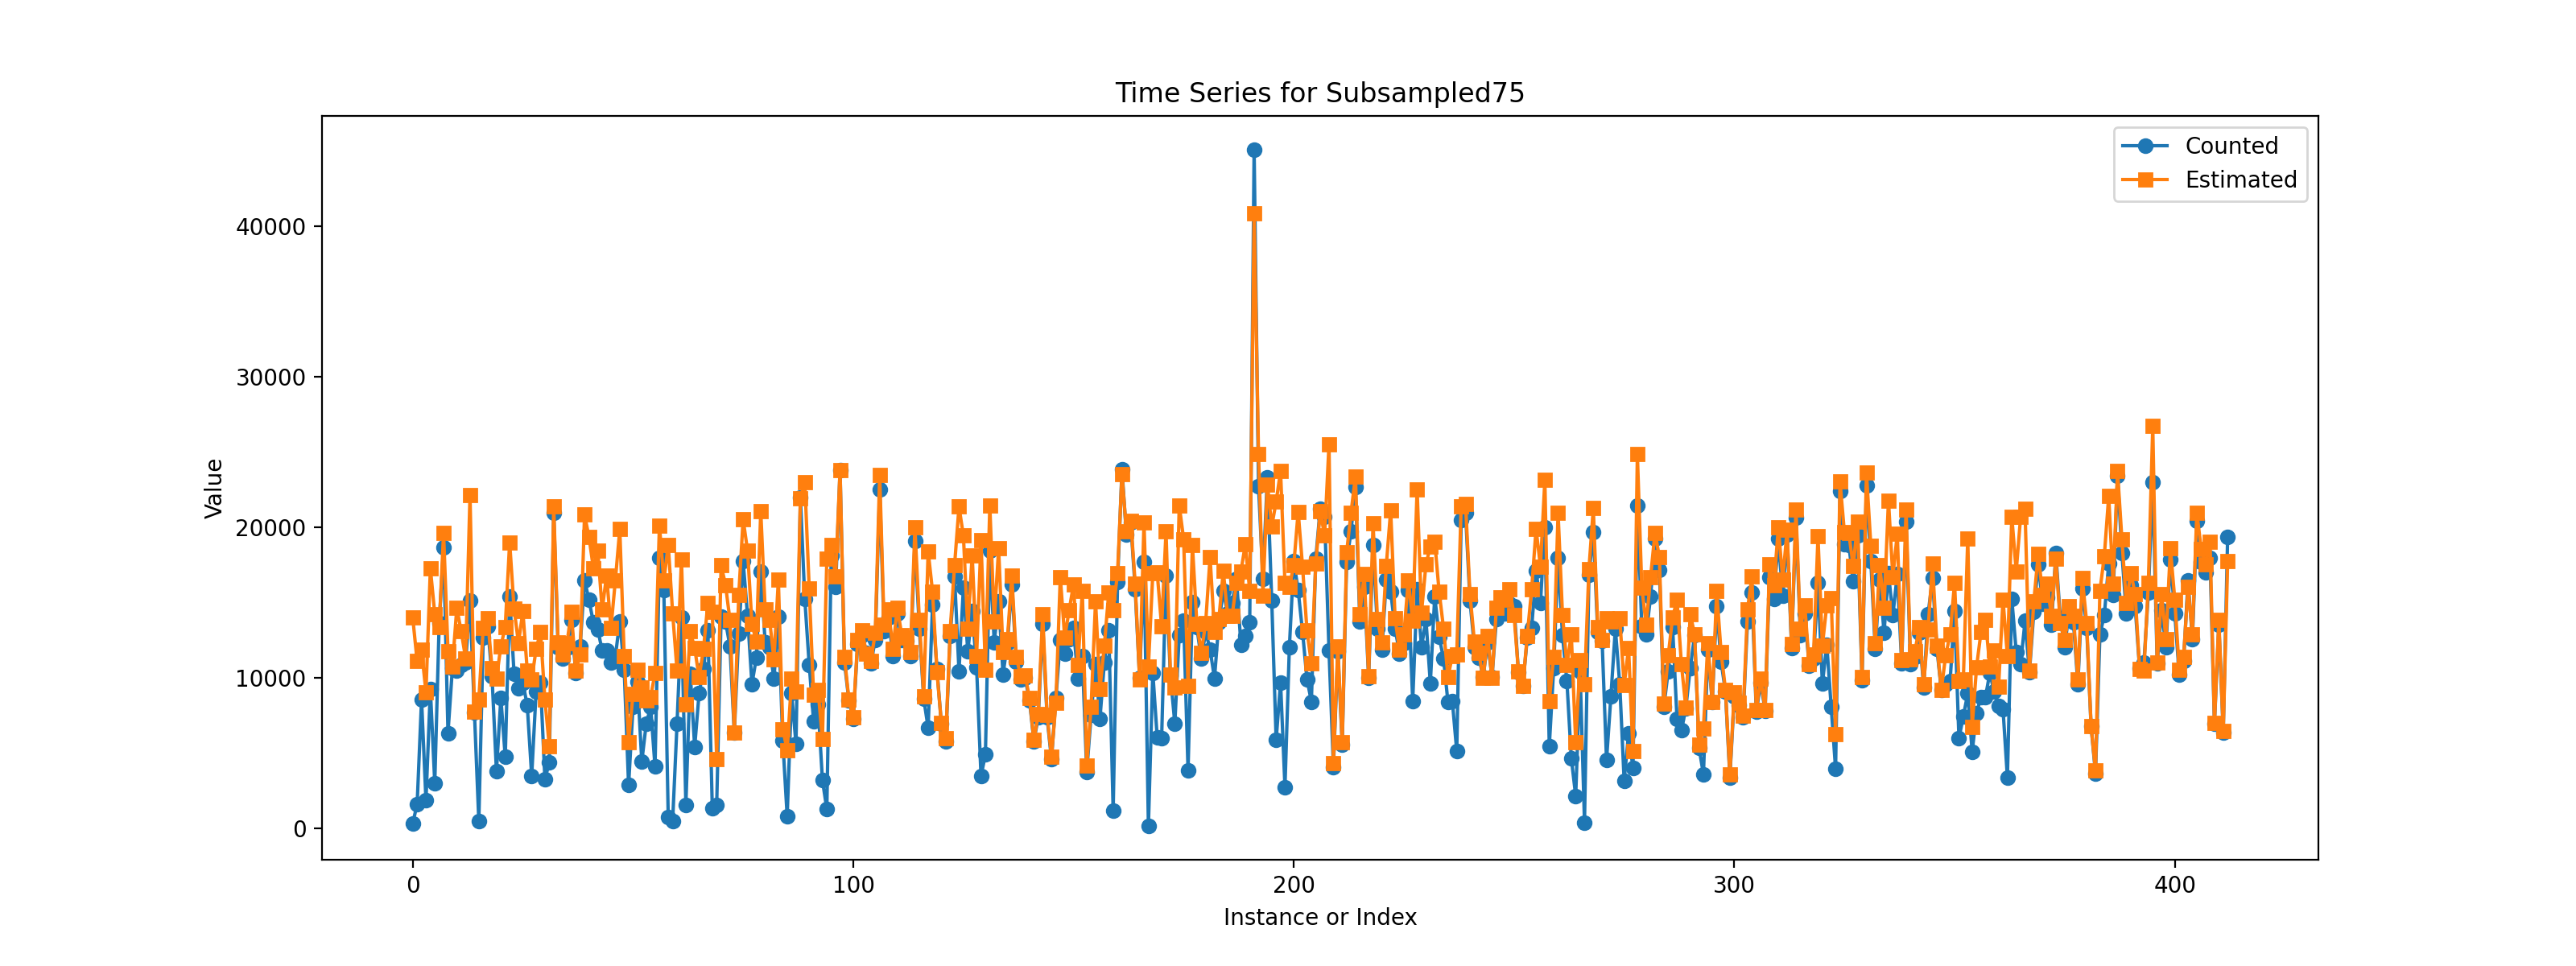

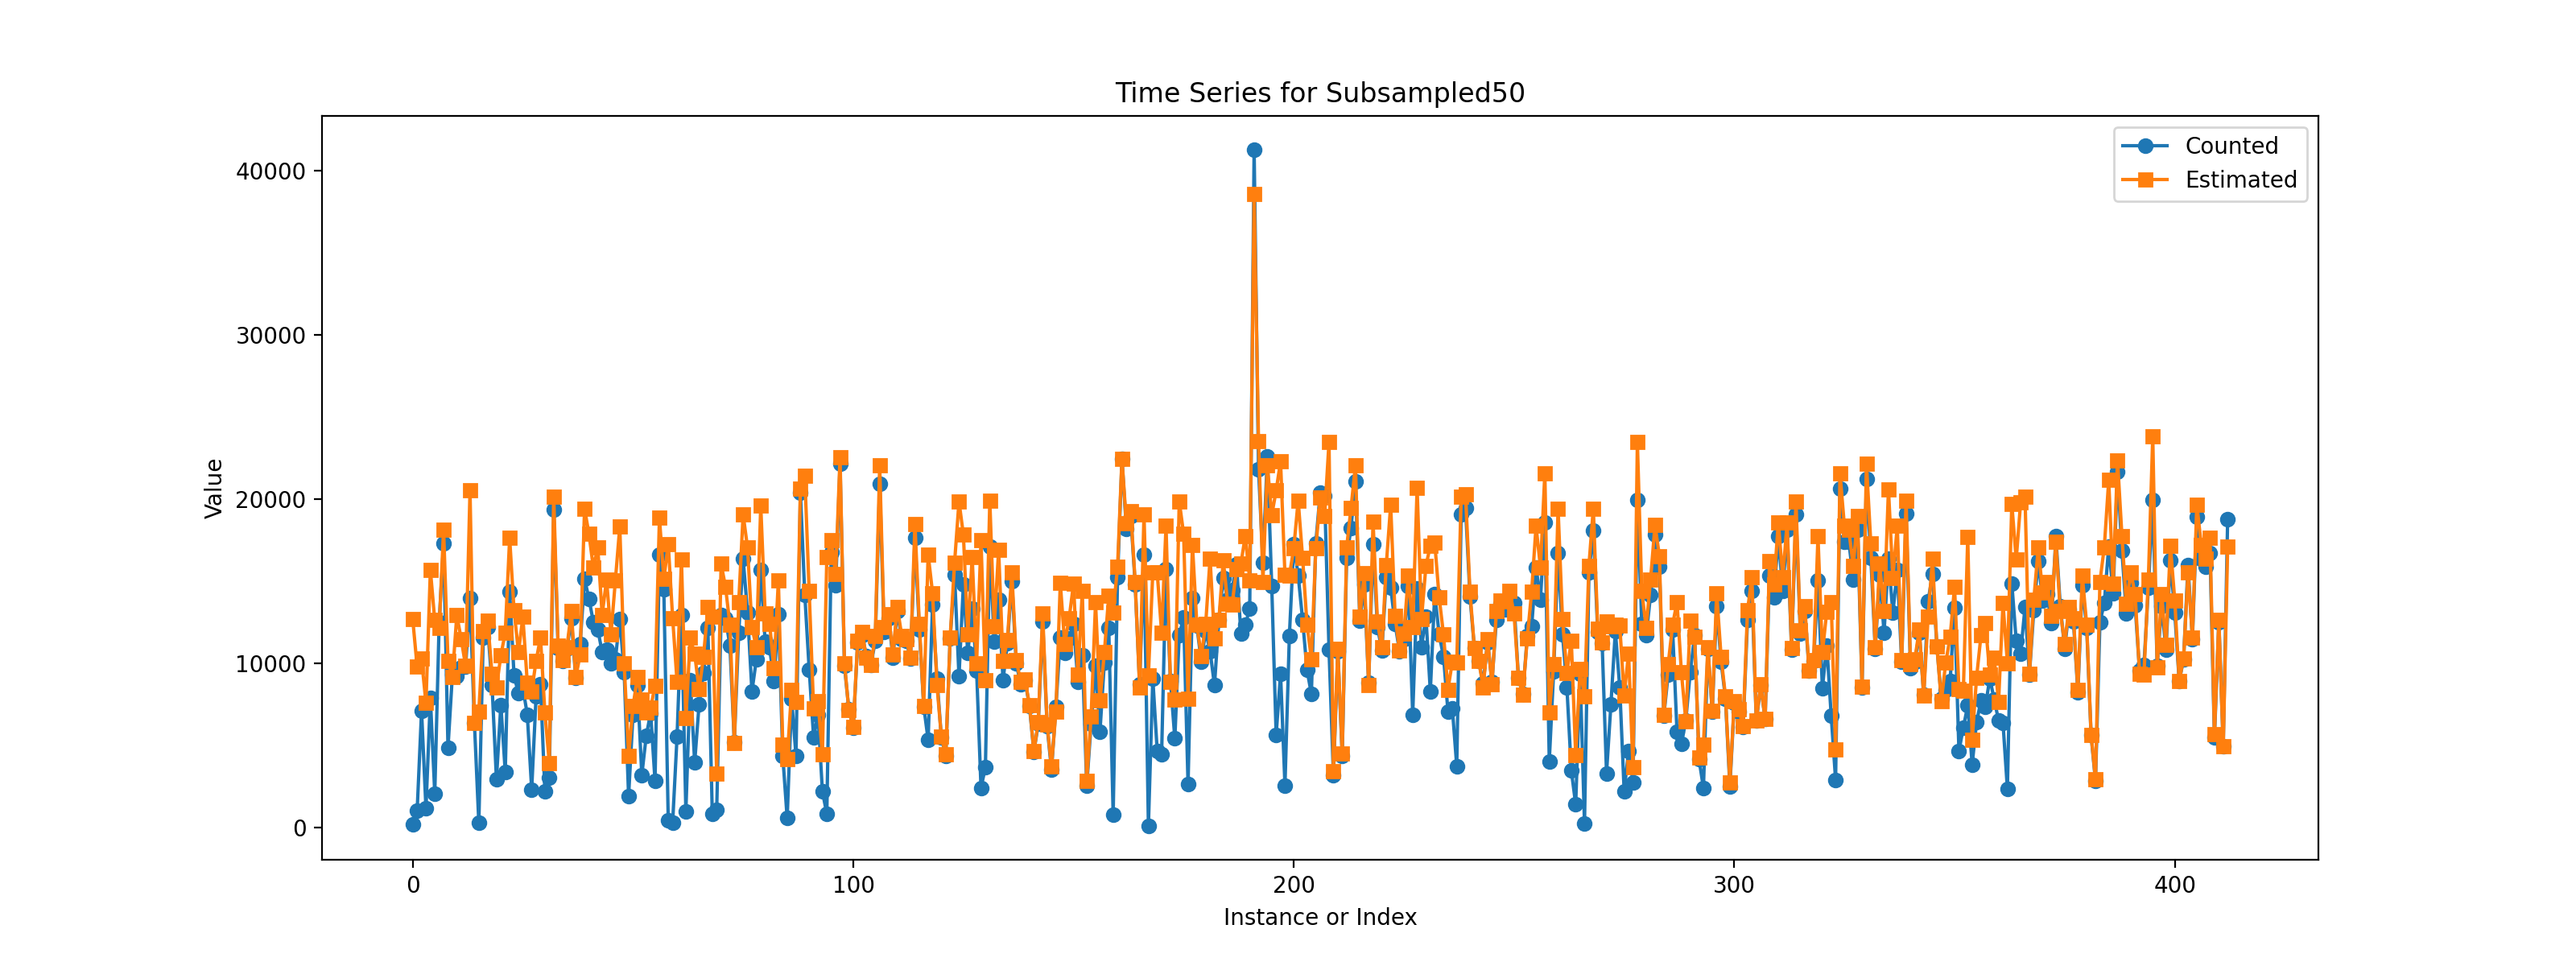

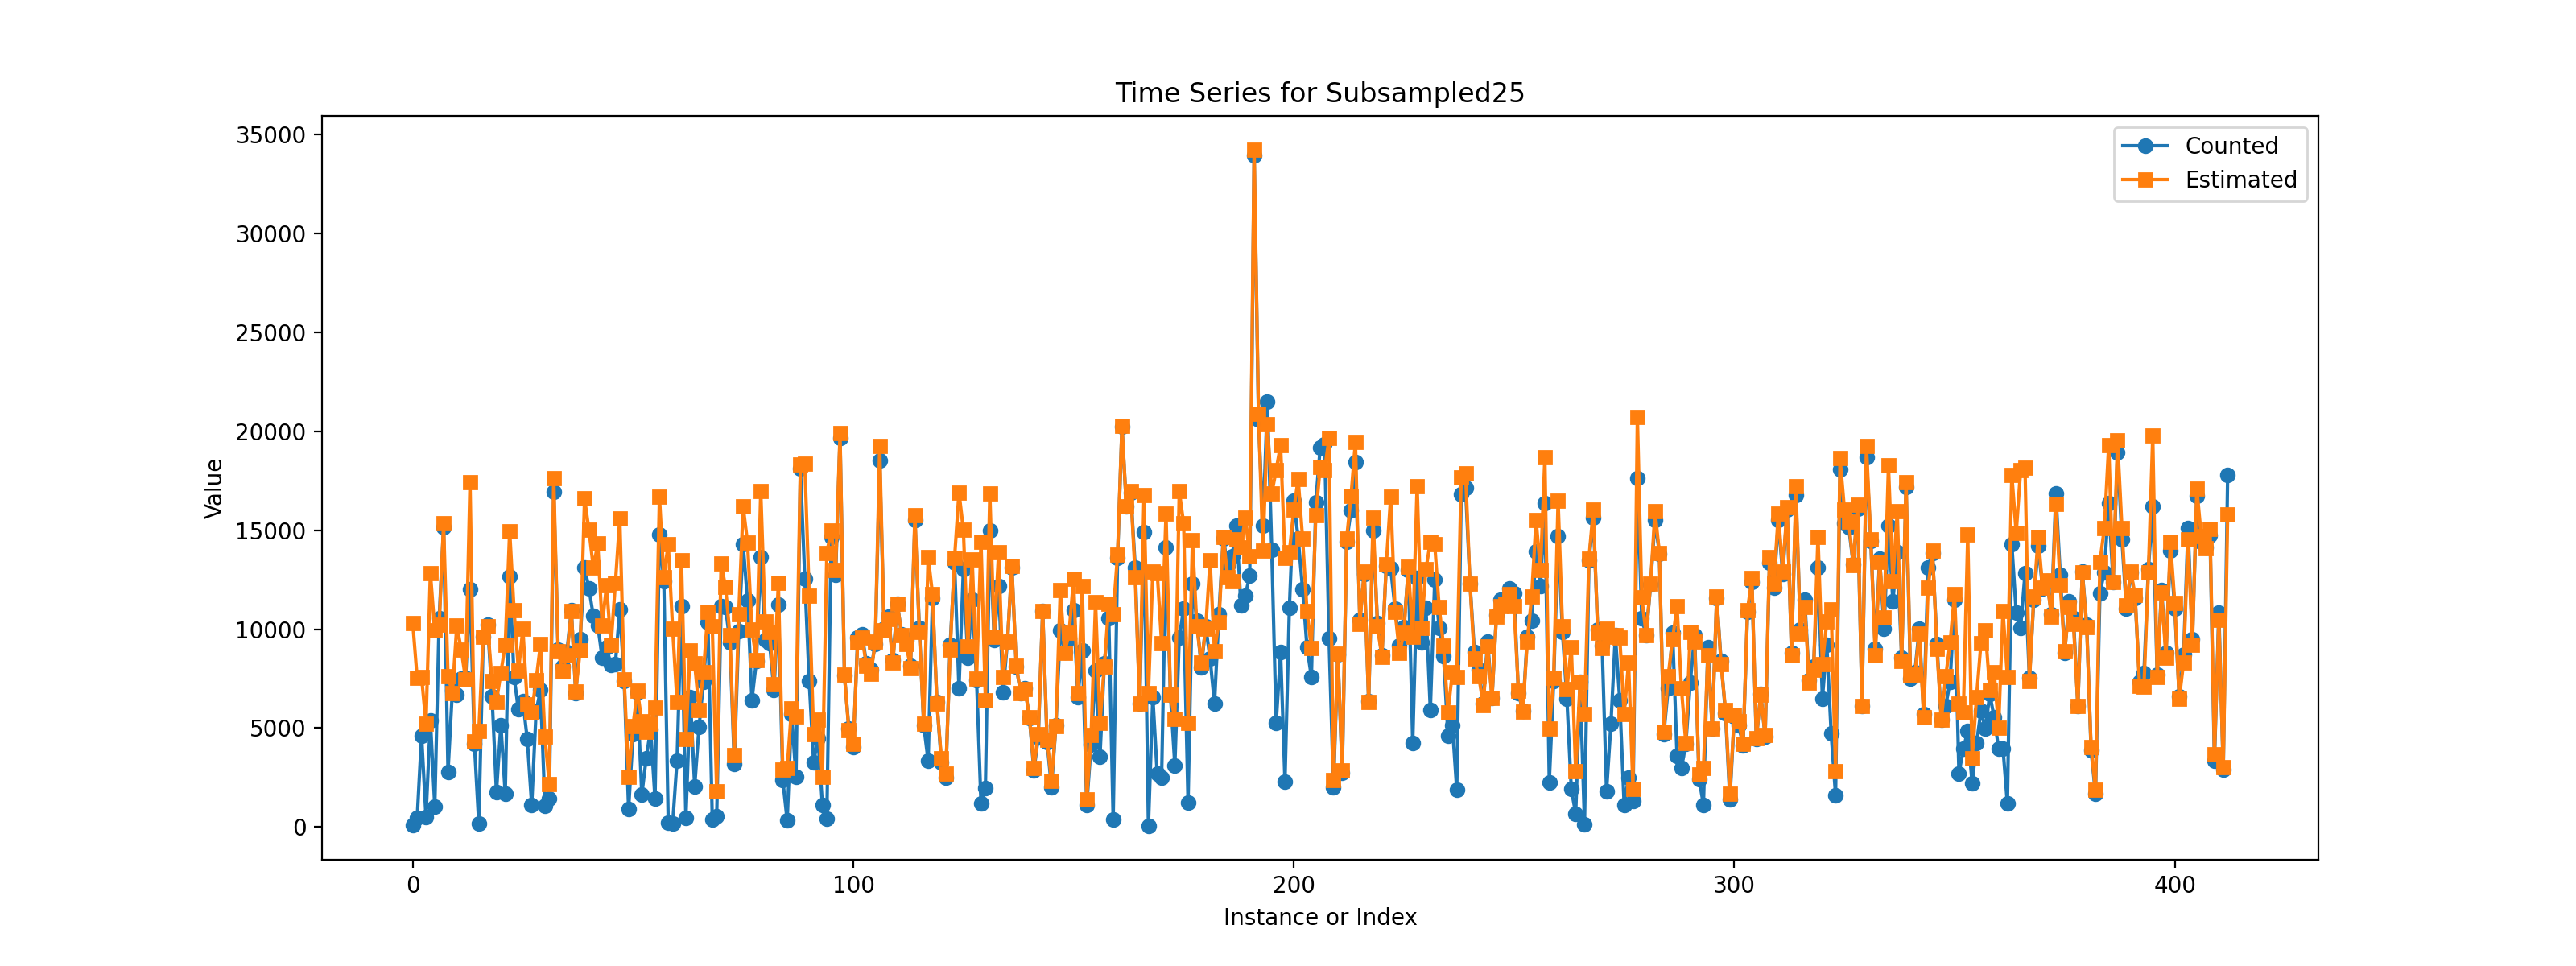

In [46]:
data_str = """
400 14755,
315 13975,
220 12685,
108 10315,
2128 11882,
1583 11080,
1023 9791,
446 7536,
9429 12791,
8540 11826,
7117 10278,
4623 7578,
2501 9952,
1825 9028,
1165 7583,
523 5234,
10080 18163,
9207 17236,
7890 15686,
5392 12842,
3745 15234,
2983 14227,
2085 12631,
1038 9947,
14378 14056,
13620 13332,
12507 12160,
10549 10230,
19664 20428,
18631 19587,
17303 18132,
15146 15343,
7278 12755,
6311 11744,
4868 10160,
2792 7639,
11461 11706,
10603 10721,
9311 9176,
6892 6768,
11262 15670,
10467 14606,
9238 12928,
6698 10194,
11578 14079,
10827 13074,
9739 11498,
7482 8978,
11814 12164,
11002 11282,
9818 9836,
7541 7478,
15995 23116,
15103 22129,
13952 20518,
12031 17415,
8640 8618,
7699 7746,
6382 6385,
4193 4335,
617 9596,
453 8552,
297 7049,
162 4850,
13505 14013,
12657 13273,
11567 11989,
9625 9630,
14313 14700,
13414 13932,
12221 12608,
10242 10163,
11022 11398,
10062 10619,
8673 9359,
6610 7360,
4501 10826,
3767 9922,
2934 8551,
1766 6332,
9427 13079,
8641 12069,
7482 10478,
5156 7794,
5710 14293,
4722 13369,
3400 11883,
1678 9222,
16221 19822,
15396 18984,
14370 17627,
12647 14957,
10953 15436,
10244 14574,
9252 13229,
7568 10944,
10032 13319,
9281 12291,
8173 10678,
5940 7893,
10349 15376,
9661 14390,
8518 12826,
6364 10006,
8966 11497,
8136 10442,
6893 8833,
4435 6211,
4363 10854,
3451 9847,
2331 8298,
1117 5786,
9764 13003,
9052 11877,
7991 10159,
5844 7408,
10286 14010,
9643 13044,
8734 11577,
6922 9230,
4111 9537,
3250 8533,
2201 7002,
1081 4564,
5382 6597,
4341 5434,
3037 3951,
1420 2156,
22030 22032,
20920 21344,
19366 20153,
16937 17633,
12774 13004,
12020 12310,
10949 11101,
8964 8879,
12066 12260,
11285 11510,
10168 10220,
8101 7880,
12698 12983,
11935 12255,
10886 10986,
8843 8666,
14618 15050,
13804 14370,
12733 13169,
10946 10905,
11126 11206,
10315 10448,
9101 9150,
6752 6852,
12726 12162,
12077 11532,
11167 10535,
9503 8912,
17448 21646,
16467 20807,
15154 19423,
13122 16595,
16095 20217,
15162 19342,
13942 17884,
12064 15016,
14453 18141,
13662 17274,
12517 15826,
10657 13094,
14002 19282,
13201 18449,
12073 17044,
10195 14324,
12546 15434,
11776 14501,
10686 12969,
8572 10197,
12492 17792,
11807 16761,
10831 15100,
9067 12211,
11677 14255,
10985 13301,
9988 11774,
8187 9191,
12187 17328,
11402 16473,
10265 15033,
8252 12320,
14578 20800,
13742 19846,
12708 18336,
11015 15609,
11242 12345,
10536 11448,
9461 9987,
7392 7444,
3636 6671,
2842 5727,
1926 4388,
917 2556,
8822 9905,
8029 8897,
6890 7385,
4676 5115,
10382 11397,
9732 10531,
8699 9163,
6797 6895,
5347 10373,
4413 9360,
3202 7810,
1637 5327,
7777 9454,
6923 8475,
5579 7015,
3483 4799,
8803 9631,
8046 8696,
6991 7309,
4945 5219,
5025 11396,
4074 10297,
2850 8629,
1422 6020,
18972 20916,
17966 20098,
16645 18858,
14765 16676,
16743 17179,
15789 16441,
14492 15139,
12421 12631,
989 19740,
724 18813,
475 17277,
235 14309,
644 15201,
458 14281,
300 12766,
163 10018,
7890 11442,
6957 10451,
5539 8889,
3362 6300,
14742 18776,
13989 17842,
12950 16315,
11163 13494,
2085 9280,
1549 8204,
1008 6652,
453 4453,
11090 13989,
10266 13056,
8997 11553,
6584 8937,
6467 12802,
5382 11955,
3963 10578,
2064 8268,
9894 11066,
8939 10016,
7515 8418,
5076 5918,
11314 12806,
10577 11882,
9405 10393,
7339 7825,
13875 15885,
13118 14945,
12173 13435,
10363 10883,
1875 15260,
1335 14361,
842 12868,
389 10133,
1999 5519,
1544 4560,
1064 3304,
544 1795,
14880 18310,
14059 17465,
12961 16059,
11179 13331,
14474 17092,
13728 16148,
12744 14662,
11133 12132,
12841 14748,
12084 13838,
11086 12353,
9331 9681,
7126 7232,
6334 6356,
5224 5171,
3191 3616,
13638 16547,
12895 15465,
11870 13723,
9890 10745,
18738 21376,
17719 20501,
16369 19069,
14274 16193,
14882 19272,
14109 18431,
13106 17044,
11439 14377,
10506 14432,
9558 13556,
8297 12194,
6421 9966,
12001 13263,
11312 12391,
10234 10970,
8379 8440,
17999 21961,
17029 21047,
15702 19610,
13644 16966,
13101 15408,
12326 14522,
11310 13051,
9448 10397,
12737 14709,
11993 13854,
10963 12431,
9301 9864,
10596 12135,
9926 11191,
8939 9692,
6917 7226,
14922 17333,
14064 16477,
12999 15049,
11237 12352,
6790 7624,
5792 6576,
4363 5057,
2381 2890,
952 5965,
787 5178,
577 4180,
336 2965,
9687 10893,
8958 9900,
7832 8374,
5720 6000,
6497 9980,
5595 9053,
4377 7668,
2528 5591,
23055 22687,
21935 21918,
20383 20659,
18112 18313,
15978 23942,
15211 22983,
14175 21430,
12558 18375,
11645 16843,
10852 15916,
9612 14399,
7372 11684,
8066 9912,
7074 8849,
5494 7240,
3269 4713,
9041 10211,
8190 9195,
6888 7687,
4472 5414,
4002 6982,
3186 5908,
2196 4447,
1110 2557,
1631 18767,
1256 17896,
853 16486,
430 13863,
19118 19527,
18080 18794,
16777 17503,
14675 14977,
16905 17426,
16010 16712,
14740 15443,
12733 13004,
24845 24534,
23764 23794,
22137 22548,
19676 19887,
11872 12149,
11013 11360,
9856 10025,
7656 7701,
9405 9434,
8497 8555,
7202 7143,
4981 4888,
8110 8135,
7274 7351,
6064 6116,
4026 4202,
12898 13135,
12230 12498,
11270 11393,
9564 9331,
13570 13851,
12831 13136,
11722 11895,
9733 9575,
12467 12312,
11649 11571,
10433 10345,
8263 8164,
11615 11848,
10933 11125,
9908 9902,
7951 7728,
13362 13707,
12512 12974,
11369 11696,
9251 9364,
23611 24297,
22494 23473,
20958 22049,
18507 19245,
13831 14247,
13071 13495,
11936 12224,
10009 9932,
14806 15402,
13965 14499,
12766 13004,
10620 10505,
12154 12700,
11429 11894,
10368 10557,
8429 8316,
15069 15345,
14240 14640,
13181 13431,
11277 11292,
13163 13479,
12488 12818,
11487 11688,
9731 9687,
13183 13339,
12438 12649,
11355 11460,
9455 9263,
12232 12512,
11435 11697,
10316 10342,
8159 8031,
20106 20843,
19063 19967,
17644 18491,
15500 15775,
14036 14665,
13257 13825,
12074 12394,
10052 9870,
9512 9614,
8581 8771,
7373 7416,
5143 5229,
7571 19467,
6654 18374,
5350 16645,
3356 13659,
15733 16511,
14841 15702,
13560 14294,
11584 11766,
11572 11450,
10551 10366,
9086 8703,
6315 6230,
7866 7941,
6911 6976,
5482 5528,
3273 3478,
6762 7104,
5780 5970,
4365 4471,
2515 2684,
13546 14006,
12755 13105,
11508 11586,
9192 8944,
17651 18215,
16701 17463,
15410 16140,
13365 13602,
11251 22248,
10425 21343,
9198 19856,
7007 16903,
16815 20403,
15942 19427,
14801 17844,
13036 15022,
12529 14170,
11747 13258,
10623 11768,
8548 9133,
15203 19129,
14399 18126,
13332 16490,
11506 13526,
11445 12334,
10678 11442,
9584 10009,
7409 7516,
4245 20095,
3448 19116,
2424 17489,
1193 14405,
5811 11507,
4879 10518,
3687 8967,
1982 6394,
19339 22334,
18407 21411,
17109 19886,
14980 16868,
13039 14623,
12334 13729,
11307 12257,
9448 9617,
15828 19578,
15035 18561,
13890 16903,
12186 13874,
11054 12663,
10218 11708,
8992 10171,
6825 7565,
13023 13223,
12285 12564,
11232 11427,
9380 9363,
17048 17440,
16188 16744,
15011 15532,
13127 13212,
11810 12022,
11072 11360,
10010 10220,
8127 8146,
10623 10800,
9862 10088,
8726 8884,
6753 6784,
10722 10830,
9989 10153,
8955 9004,
7006 6965,
9254 9366,
8495 8652,
7392 7482,
5510 5537,
6644 6631,
5776 5837,
4632 4652,
2855 3005,
8157 8275,
7372 7557,
6309 6429,
4530 4711,
14308 14872,
13550 14216,
12548 13068,
10931 10934,
8186 8230,
7352 7492,
6205 6305,
4300 4426,
5312 5432,
4562 4749,
3515 3732,
2006 2334,
9408 9072,
8621 8299,
7340 7073,
5149 5103,
13197 17827,
12501 16688,
11570 14905,
9943 11973,
12265 13564,
11569 12654,
10666 11206,
8828 8808,
13166 15518,
12520 14443,
11502 12727,
9544 9823,
13939 16998,
13280 16178,
12392 14843,
10949 12526,
10551 11749,
9917 10815,
8871 9312,
6580 6764,
12015 16595,
11402 15764,
10508 14428,
8942 12173,
4801 5189,
3742 4164,
2551 2873,
1130 1404,
8313 8903,
7518 8074,
6353 6784,
4176 4661,
11541 15900,
10869 15070,
9879 13709,
7916 11361,
8196 10204,
7252 9242,
5829 7732,
3550 5275,
11600 13003,
10992 12122,
10078 10675,
8276 8125,
13870 16545,
13149 15625,
12153 14109,
10568 11297,
1488 15327,
1149 14473,
798 13105,
367 10751,
17132 17551,
16367 16949,
15244 15889,
13617 13769,
24771 24186,
23825 23531,
22432 22476,
20227 20287,
20408 20469,
19481 19732,
18192 18509,
16200 16199
21238 21139,
20278 20431,
18969 19252,
16902 16995,
16718 17007,
15869 16234,
14822 14938,
13132 12637,
10783 10687,
9994 9890,
8736 8559,
6223 6235,
18524 21050,
17681 20291,
16598 19092,
14895 16759,
185 11643,
140 10736,
108 9270,
56 6770,
11168 17755,
10318 16929,
9062 15553,
6575 12917,
6903 17824,
6011 16960,
4686 15532,
2683 12848,
6979 14342,
5944 13390,
4473 11867,
2505 9280,
17605 20524,
16783 19704,
15752 18372,
14111 15841,
10908 10965,
10115 10188,
8941 8893,
6689 6666,
7978 10408,
6945 9347,
5427 7792,
3120 5471,
13617 22381,
12828 21422,
11741 19877,
9584 16969,
14587 19982,
13791 19190,
12779 17883,
11031 15337,
4852 10489,
3846 9460,
2645 7867,
1241 5265,
15802 19727,
14993 18774,
13992 17225,
12295 14489,
14143 14249,
13340 13560,
12294 12370,
10433 10127,
12011 12311,
11236 11640,
10115 10452,
8063 8306,
13874 14356,
13036 13639,
11975 12384,
10127 10028,
12616 18965,
11869 17993,
10748 16385,
8524 13473,
10772 13979,
9944 13043,
8672 11525,
6229 8865,
14375 14591,
13669 13880,
12640 12649,
10757 10357,
16164 17443,
15739 17069,
15217 16292,
14582 14647,
14547 14361
14253 14087,
13873 13627,
13196 12622,
15284 14444,
14927 14105,
14479 13569,
13692 12432,
16944 16614,
16580 16291,
16049 15738,
15232 14539,
12440 17567,
12180 17025,
11817 16070,
11194 14135,
13049 19444,
12770 18847,
12365 17768,
11705 15629,
13933 16210,
13658 15760,
13320 15072,
12699 13676,
47202 42237,
45053 40814,
41270 38561,
33958 34224,
23435 25492,
22690 24832,
21817 23542,
20587 20875,
16890 15770,
16581 15456,
16142 14970,
15225 13985,
23816 23279,
23281 22828,
22609 22064,
21497 20366,
15420 20658,
15121 20043,
14700 19024,
13995 16856,
6019 22366,
5859 21688,
5655 20522,
5267 18040,
9912 24502,
9684 23704,
9381 22299,
8835 19300,
2810 16830,
2715 16265,
2570 15383,
2293 13608,
12251 16494,
12003 16044,
11666 15336,
11083 13891,
18063 17722,
17735 17448,
17261 17013,
16480 16040,
16125 21664,
15790 21018,
15362 19922,
14590 17575,
13278 17881,
13013 17336,
12673 16450,
12023 14587,
10082 13564,
9888 13116,
9611 12382,
9086 10901,
8606 11354,
8400 10927,
8141 10274,
7588 9037,
18306 17925,
17907 17578,
17330 17007,
16424 15758,
21867 21591,
21202 21042,
20400 20082,
19173 18201,
21015 19716,
20686 19434,
20217 18985,
19338 18018,
12461 26703,
11778 25494,
10852 23472,
9550 19645,
4763 4983,
4025 4332,
3179 3447,
1994 2361,
12514 12729,
11750 12060,
10745 10900,
8738 8754,
6422 6491,
5544 5690,
4375 4504,
2742 2881,
18611 19015,
17660 18303,
16413 17051,
14428 14559,
20879 21804,
19715 20950,
18255 19478,
15990 16732,
23813 24135,
22671 23361,
21072 22050,
18431 19473,
14519 15039,
13719 14227,
12586 12833,
10487 10280,
16965 17667,
16036 16879,
14806 15501,
12789 12905,
10823 10920,
10000 10091,
8810 8703,
6355 6308,
19947 21151,
18806 20237,
17279 18640,
15002 15647,
13984 14634,
13249 13865,
12203 12531,
10296 10136,
12600 13130,
11843 12331,
10794 10971,
8680 8592,
17457 18252,
16490 17433,
15250 15990,
13208 13266,
16531 21967,
15698 21094,
14621 19644,
13072 16707,
13875 14502,
13259 13926,
12410 12896,
11045 10872,
12176 12426,
11608 11836,
10748 10802,
9161 8811,
12880 13419,
12288 12844,
11501 11817,
10105 9830,
16577 17094,
15808 16466,
14728 15341,
12990 13135,
9468 14729,
8431 13762,
6892 12206,
4255 9618,
16785 23612,
15860 22501,
14574 20678,
12595 17241,
12683 15306,
11989 14315,
11001 12725,
9346 10077,
14677 18441,
13884 17503,
12837 15929,
11072 13029,
10498 19657,
9613 18712,
8299 17173,
5909 14406,
16221 20024,
15391 19010,
14233 17346,
12497 14274,
13398 16715,
12700 15700,
11761 14031,
10058 11103,
11832 14190,
11253 13263,
10403 11753,
8655 9153,
9159 11082,
8362 10041,
7079 8413,
4619 5790,
9175 12243,
8418 11427,
7250 10105,
5157 7809,
6160 12449,
5115 11525,
3745 10037,
1883 7562,
21512 22106,
20432 21389,
19050 20137,
16819 17650,
21971 22233,
20913 21509,
19466 20276,
17131 17884,
15907 16238,
15099 15549,
14064 14381,
12318 12301,
12785 13278,
12013 12394,
10937 10935,
8862 8509,
12109 12547,
11341 11641,
10141 10143,
7942 7625,
10949 10824,
10058 9955,
8771 8537,
6228 6170,
13084 13501,
12349 12750,
11305 11460,
9391 9140,
10835 10680,
10044 9954,
8886 8724,
6534 6514,
14749 15466,
13871 14643,
12675 13216,
10723 10651,
15683 16176,
14831 15309,
13640 13825,
11478 11165,
14998 15927,
14231 15143,
13270 13785,
11495 11294,
15746 16664,
14916 15849,
13845 14419,
12046 11755,
15539 14883,
14736 14168,
13679 13027,
11818 11145,
11149 11144,
10353 10391,
9124 9118,
6749 6872,
10287 10282,
9426 9448,
8125 8086,
5870 5837,
13354 13511,
12625 12772,
11650 11530,
9610 9385,
14095 16761,
13299 15854,
12246 14379,
10422 11669,
18002 20775,
17089 19858,
15851 18369,
13946 15520,
15714 18305,
14952 17377,
13892 15837,
12191 12976,
20986 24062,
19996 23116,
18582 21593,
16370 18678,
6372 9447,
5412 8454,
4052 7029,
2272 4971,
11297 12265,
10616 11381,
9540 9962,
7387 7523,
18863 21863,
17950 20937,
16722 19418,
14715 16497,
13505 15071,
12813 14166,
11773 12712,
9846 10164,
10513 11740,
9764 10845,
8558 9422,
6482 6991,
5571 13792,
4649 12854,
3493 11399,
1916 9103,
2765 6665,
2131 5685,
1417 4401,
674 2811,
11126 12112,
10398 11154,
9387 9682,
7343 7354,
504 10560,
370 9539,
247 8005,
131 5709,
17743 17876,
16814 17170,
15530 15937,
13476 13547,
20897 22266,
19662 21245,
18085 19437,
15633 16052,
13777 14087,
13013 13372,
11911 12134,
9997 9802,
13251 13239,
12421 12512,
11255 11282,
9155 9029,
5392 14774,
4510 13928,
3316 12540,
1819 10041,
9645 14591,
8774 13699,
7519 12238,
5217 9614,
14140 14765,
13239 13886,
11989 12366,
9681 9704,
10215 14963,
9552 13951,
8531 12315,
6408 9581,
3934 10390,
3134 9480,
2220 8054,
1109 5714,
7406 12846,
6267 11983,
4676 10607,
2500 8306,
4941 6167,
3997 5101,
2768 3686,
1304 1938,
22365 25672,
21408 24823,
19949 23471,
17631 20729,
14143 16955,
13411 15982,
12416 14407,
10545 11605,
13730 14287,
12872 13523,
11708 12173,
9685 9705,
16261 17551,
15369 16669,
14185 15127,
12270 12310,
20280 20331,
19209 19627,
17834 18412,
15496 15951,
18073 18797,
17151 17990,
15867 16547,
13822 13841,
8875 9223,
8049 8288,
6805 6859,
4699 4802,
11006 12419,
10401 11456,
9343 9960,
7027 7639,
14230 14958,
13328 13990,
12069 12356,
9819 9500,
8228 16009,
7238 15155,
5818 13745,
3602 11157,
7410 11773,
6478 10879,
5094 9445,
2979 7008,
8976 8956,
7971 7997,
6551 6502,
4208 4239,
11341 15187,
10613 14222,
9458 12628,
7296 9865,
13624 13560,
12821 12845,
11701 11629,
9697 9380,
6215 6521,
5326 5565,
4161 4257,
2426 2642,
4498 7759,
3561 6627,
2410 5062,
1127 2981,
12523 13014,
11837 12268,
10899 10991,
9094 8697,
9215 9187,
8355 8392,
7090 7100,
4986 4990,
15658 16582,
14734 15737,
13470 14279,
11583 11662,
11758 12427,
11068 11687,
10123 10422,
8389 8234,
9827 9898,
9066 9190,
7867 7991,
5752 5926,
4122 4114,
3364 3547,
2498 2738,
1400 1679,
9610 9782,
8772 8991,
7602 7704,
5570 5660,
8930 8999,
8172 8324,
7089 7195,
5135 5337,
8168 8269,
7348 7475,
6111 6205,
4120 4197,
14538 15246,
13727 14498,
12636 13223,
10856 10957,
16617 17576,
15655 16718,
14430 15247,
12367 12586,
8537 8691,
7710 7861,
6503 6535,
4439 4491,
10451 10673,
9659 9945,
8660 8736,
6726 6695,
8609 8629,
7795 7864,
6618 6625,
4587 4646,
17712 18275,
16655 17526,
15368 16209,
13355 13637,
16124 16869,
15227 16115,
14023 14791,
12112 12282,
20335 20743,
19217 19962,
17756 18597,
15507 15853,
16219 17214,
15410 16498,
14403 15235,
12768 12921,
20449 20557,
19497 19812,
18155 18568,
16054 16177,
12724 12934,
11977 12206,
10857 10958,
8801 8677,
21707 21894,
20617 21154,
19092 19865,
16766 17226,
13569 13968,
12803 13257,
11809 12034,
9999 9794,
14966 15544,
14237 14791,
13209 13498,
11468 11139,
11572 11666,
10755 10892,
9543 9589,
7409 7301,
12054 12271,
11255 11505,
10130 10216,
8094 7930,
17194 20352,
16285 19367,
15036 17728,
13127 14679,
10356 13016,
9584 12120,
8505 10679,
6493 8230,
12984 15832,
12183 14815,
11088 13165,
9205 10376,
8903 16162,
8067 15248,
6825 13730,
4719 11012,
4671 7248,
3913 6214,
2914 4758,
1586 2819,
23596 23869,
22382 23011,
20645 21561,
18063 18659,
19893 20365,
18838 19630,
17382 18370,
15342 16047,
19939 20432,
18786 19576,
17426 18118,
15137 15415,
17302 18225,
16391 17392,
15122 15937,
13296 13254,
20498 21160,
19452 20353,
18155 18965,
16084 16276,
10665 10947,
9829 10054,
8553 8577,
6124 6101,
23928 24433,
22770 23601,
21206 22160,
18704 19248,
18689 19584,
17736 18751,
16423 17289,
14437 14525,
12567 13036,
11893 12272,
10885 10975,
8986 8675,
17355 18276,
16486 17467,
15383 16059,
13569 13397,
13753 15558,
12991 14645,
11890 13179,
10018 10602,
17312 22499,
16931 21762,
16369 20604,
15223 18264,
14962 17554,
14128 16672,
13086 15199,
11411 12426,
17730 20275,
16851 19554,
15682 18366,
13873 15960,
11493 11720,
10914 11176,
10092 10214,
8542 8405,
21301 21885,
20358 21176,
19105 19920,
17185 17437,
11685 11939,
10881 11215,
9722 9945,
7512 7679,
12239 12582,
11362 11724,
10119 10266,
7830 7719,
13759 14033,
12956 13321,
11893 12089,
10028 9795,
10222 10477,
9354 9550,
8092 8032,
5726 5539,
14489 13439,
14224 13204,
13798 12835,
13115 12101,
17412 18275,
16584 17587,
15447 16365,
13858 13973,
12542 12741,
11928 12124,
11023 11043,
9256 8992,
10031 10152,
9150 9193,
7831 7690,
5437 5420,
10345 12396,
9571 11494,
8393 10052,
6126 7607,
10369 13592,
9783 12845,
8933 11605,
7344 9321,
15184 17289,
14423 16294,
13376 14668,
11505 11787,
6869 10574,
5952 9754,
4661 8443,
2716 6234,
8312 10865,
7428 9879,
6105 8330,
3941 5788,
9939 20129,
8944 19215,
7443 17694,
4867 14762,
6025 7735,
5066 6741,
3851 5359,
2194 3454,
8475 11674,
7640 10687,
6407 9133,
4234 6582,
9342 13805,
8695 13017,
7746 11701,
5865 9306,
9534 14683,
8671 13854,
7375 12477,
4967 9949,
11008 11655,
10290 10753,
9085 9342,
6709 6948,
9831 12679,
9052 11782,
7820 10339,
5534 7822,
9112 10496,
8123 9377,
6520 7678,
3968 5031,
8871 16100,
7903 15185,
6379 13675,
3978 10919,
4180 12273,
3355 11415,
2354 10026,
1179 7583,
15451 21312,
15223 20688,
14881 19717,
14293 17803,
11936 17513,
11710 17051,
11384 16330,
10844 14867,
11069 21214,
10867 20660,
10598 19790,
10082 18024,
13975 21827,
13754 21182,
13429 20174,
12814 18155,
11009 11122,
10341 10484,
9320 9383,
7521 7371,
15167 15702,
14360 15048,
13262 13878,
11502 11629,
18491 18883,
17532 18216,
16246 17042,
14202 14668,
15750 16151,
14908 15496,
13844 14342,
12044 12090,
16166 16980,
15350 16241,
14203 14938,
12429 12445,
14301 14752,
13525 14080,
12447 12897,
10764 10633,
18577 18166,
18248 17872,
17737 17394,
16853 16337,
14275 13873,
13952 13603,
13510 13168,
12752 12205,
12812 13232,
12027 12487,
10908 11188
8794 8868,
15124 15462,
14351 14721,
13300 13455,
11406 11128,
14475 14914,
13647 14111,
12543 12743,
10535 10276,
10337 10788,
9542 9862,
8249 8395,
6126 6120,
16746 17308,
15903 16592,
14761 15336,
12920 12880,
14033 14372,
13276 13636,
12176 12375,
10234 10095,
7556 7460,
6773 6746,
5633 5652,
3889 4024,
4275 4439,
3623 3816,
2835 2958,
1670 1885,
13097 16239,
12849 15744,
12504 14966,
11828 13379,
14458 18689,
14141 18062,
13680 17086,
12875 15099,
17828 22622,
17563 22052,
17134 21156,
16376 19304,
16346 17009,
15464 16232,
14283 14880,
12385 12369,
24641 24487,
23401 23699,
21653 22349,
18946 19530,
19336 19945,
18243 19151,
16852 17765,
14538 15112,
15136 15717,
14232 14963,
13040 13644,
11047 11197,
17084 17764,
16150 16955,
14930 15552,
12872 12929,
15617 16341,
14752 15560,
13540 14203,
11558 11715,
11354 11312,
10639 10586,
9559 9363,
7356 7131,
11677 11181,
10987 10478,
9894 9305,
7784 7112,
16340 16920,
15662 16269,
14596 15117,
13016 12867,
25383 28500,
22952 26695,
19972 23834,
16201 19766,
11593 11706,
10942 10995,
9877 9778,
7699 7570,
15209 16234,
14464 15517,
13510 14245,
11967 11849,
12888 13357,
12012 12538,
10855 11115,
8818 8574,
18938 19358,
17828 18566,
16299 17163,
13950 14428,
15237 15925,
14263 15172,
13082 13836,
11040 11317,
11129 11524,
10196 10525,
8916 8935,
6591 6466,
11631 11948,
11094 11356,
10268 10314,
8711 8328,
16773 16302,
16450 16019,
15994 15560,
15107 14548,
13322 13633,
12537 12882,
11487 11591,
9490 9220,
21419 21679,
20394 20950,
18937 19682,
16749 17093,
18608 19256,
17660 18520,
16380 17225,
14403 14706,
17825 18201,
16981 17533,
15877 16361,
14110 14081,
18815 19813,
17931 19022,
16709 17656,
14742 15065,
7911 7738,
6923 6967,
5475 5701,
3336 3664,
14242 14484,
13527 13817,
12525 12659,
10854 10467,
7365 7477,
6349 6428,
4976 4946,
2887 3028,
19676 18086,
19356 17707,
18794 17097,
17790 15816
"""

data = []

# Processing input data
for i, line in enumerate(data_str.strip().split('\n')):
    parts = line.replace(',', '').split()
    if len(parts) != 2:
        print(f"Unexpected number of values on line {i+1}: {line}")
        continue  
    counted, estimated = map(int, parts)
    label = labels[i % 4]
    instance = i // 4
    data.append((instance, counted, estimated, label))


# Create DataFrame
df = pd.DataFrame(data, columns=['Time', 'Counted', 'Estimated', 'Label'])

# Plotting
for label in labels:
    subset = df[df['Label'] == label]
    plt.figure(figsize=(16,6))
    plt.plot(subset['Time'], subset['Counted'], label='Counted', marker='o')
    plt.plot(subset['Time'], subset['Estimated'], label='Estimated', marker='s')
    plt.title(f'Time Series for {label}')
    plt.xlabel('Instance or Index')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

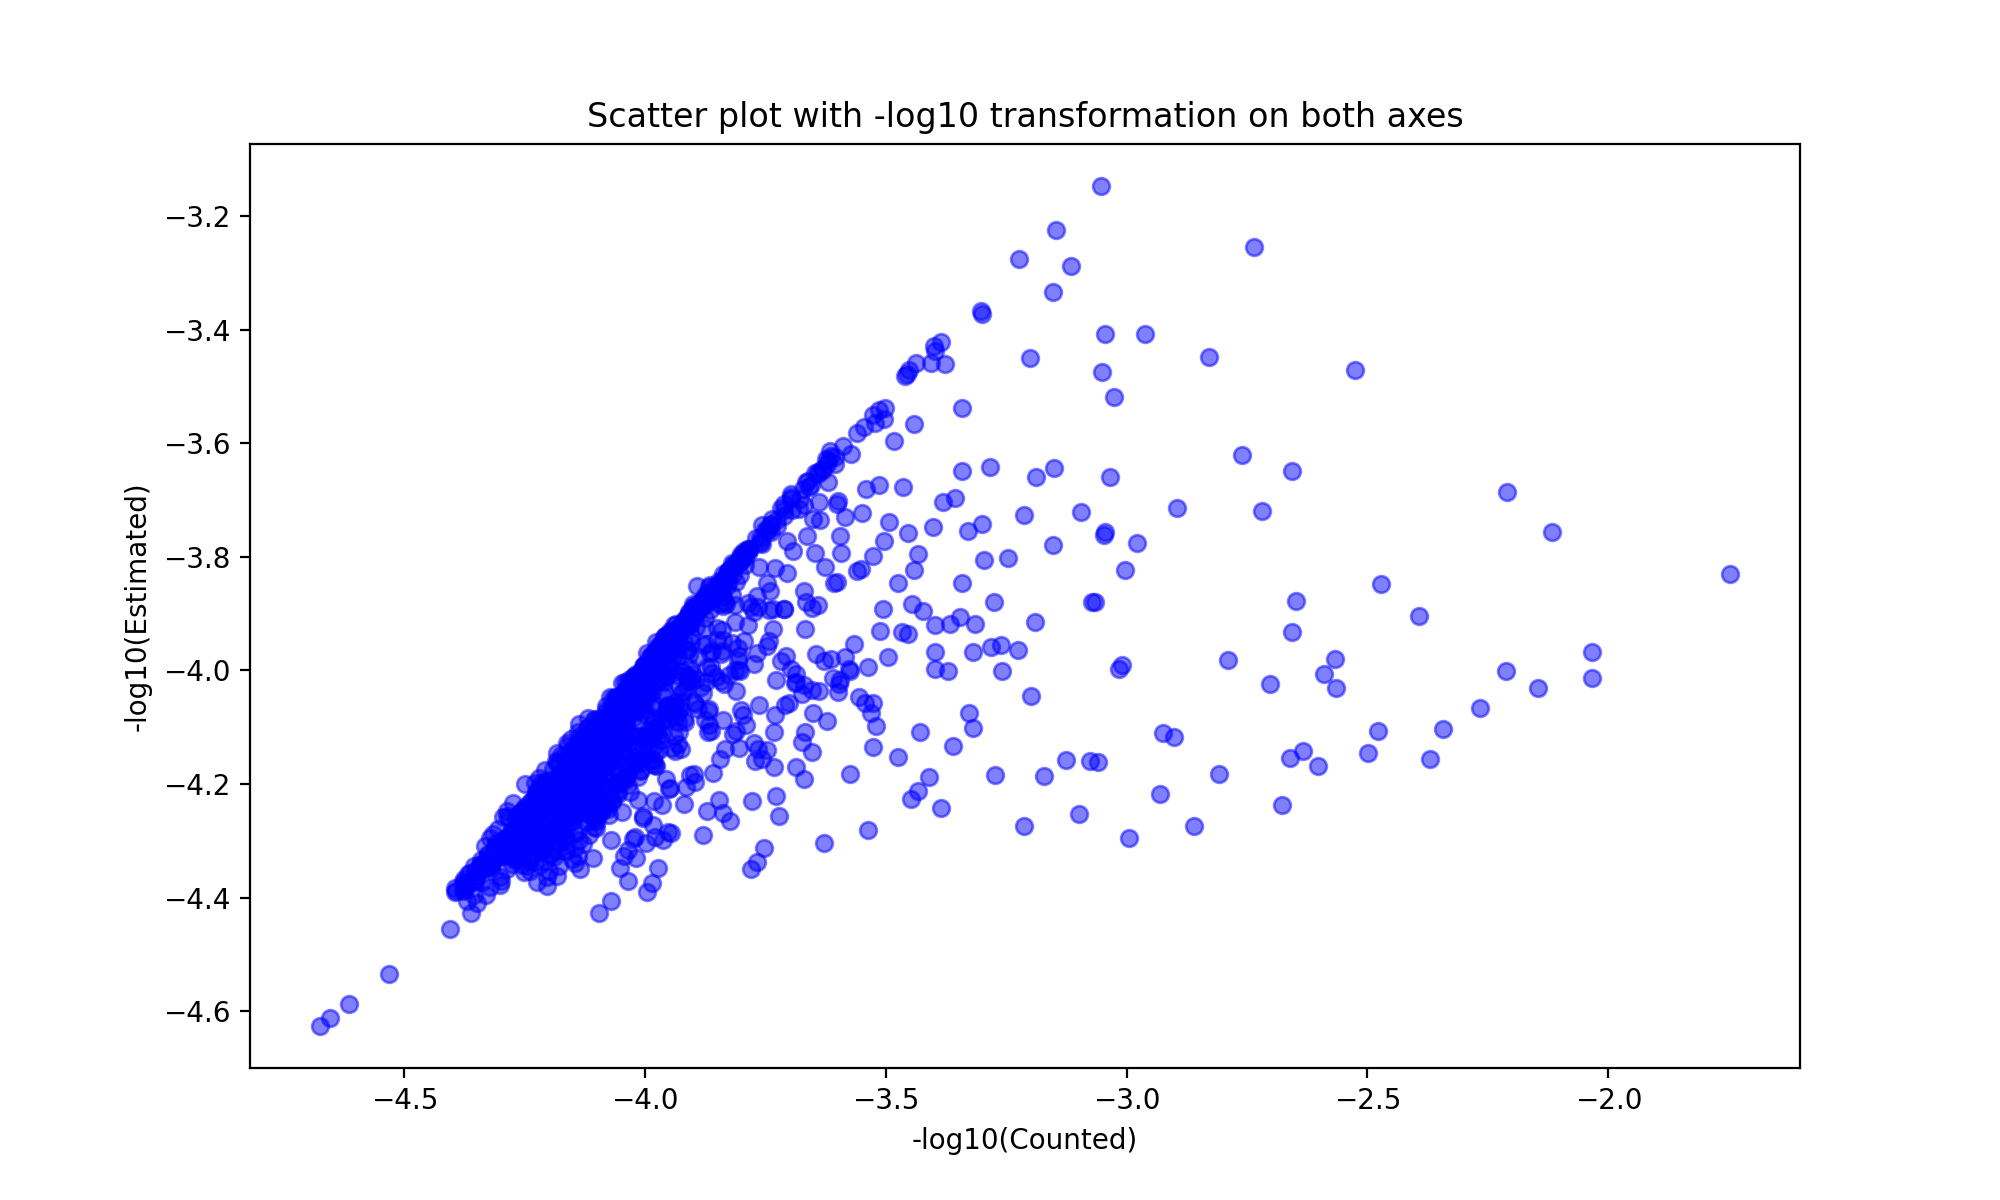

In [47]:
import numpy as np
# Define the transformation
def neg_log10(x):
    return -np.log10(x)

# Applying the transformation to the 'Counted' and 'Estimated' columns and plot
plt.figure(figsize=(10, 6))
plt.scatter(neg_log10(df['Counted']), neg_log10(df['Estimated']), c='blue', alpha=0.5)

# Adding labels and title
plt.xlabel('-log10(Counted)')
plt.ylabel('-log10(Estimated)')
plt.title('Scatter plot with -log10 transformation on both axes')

plt.show()

C:\Users\Cem\anaconda3\lib\site-packages\seaborn\regression.py:582: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
C:\Users\Cem\anaconda3\lib\site-packages\seaborn\regression.py:582: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
C:\Users\Cem\AppData\Local\Temp\ipykernel_22376\2271464918.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\Cem\AppData\Local\Temp\ipykernel_22376\2271464918.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator


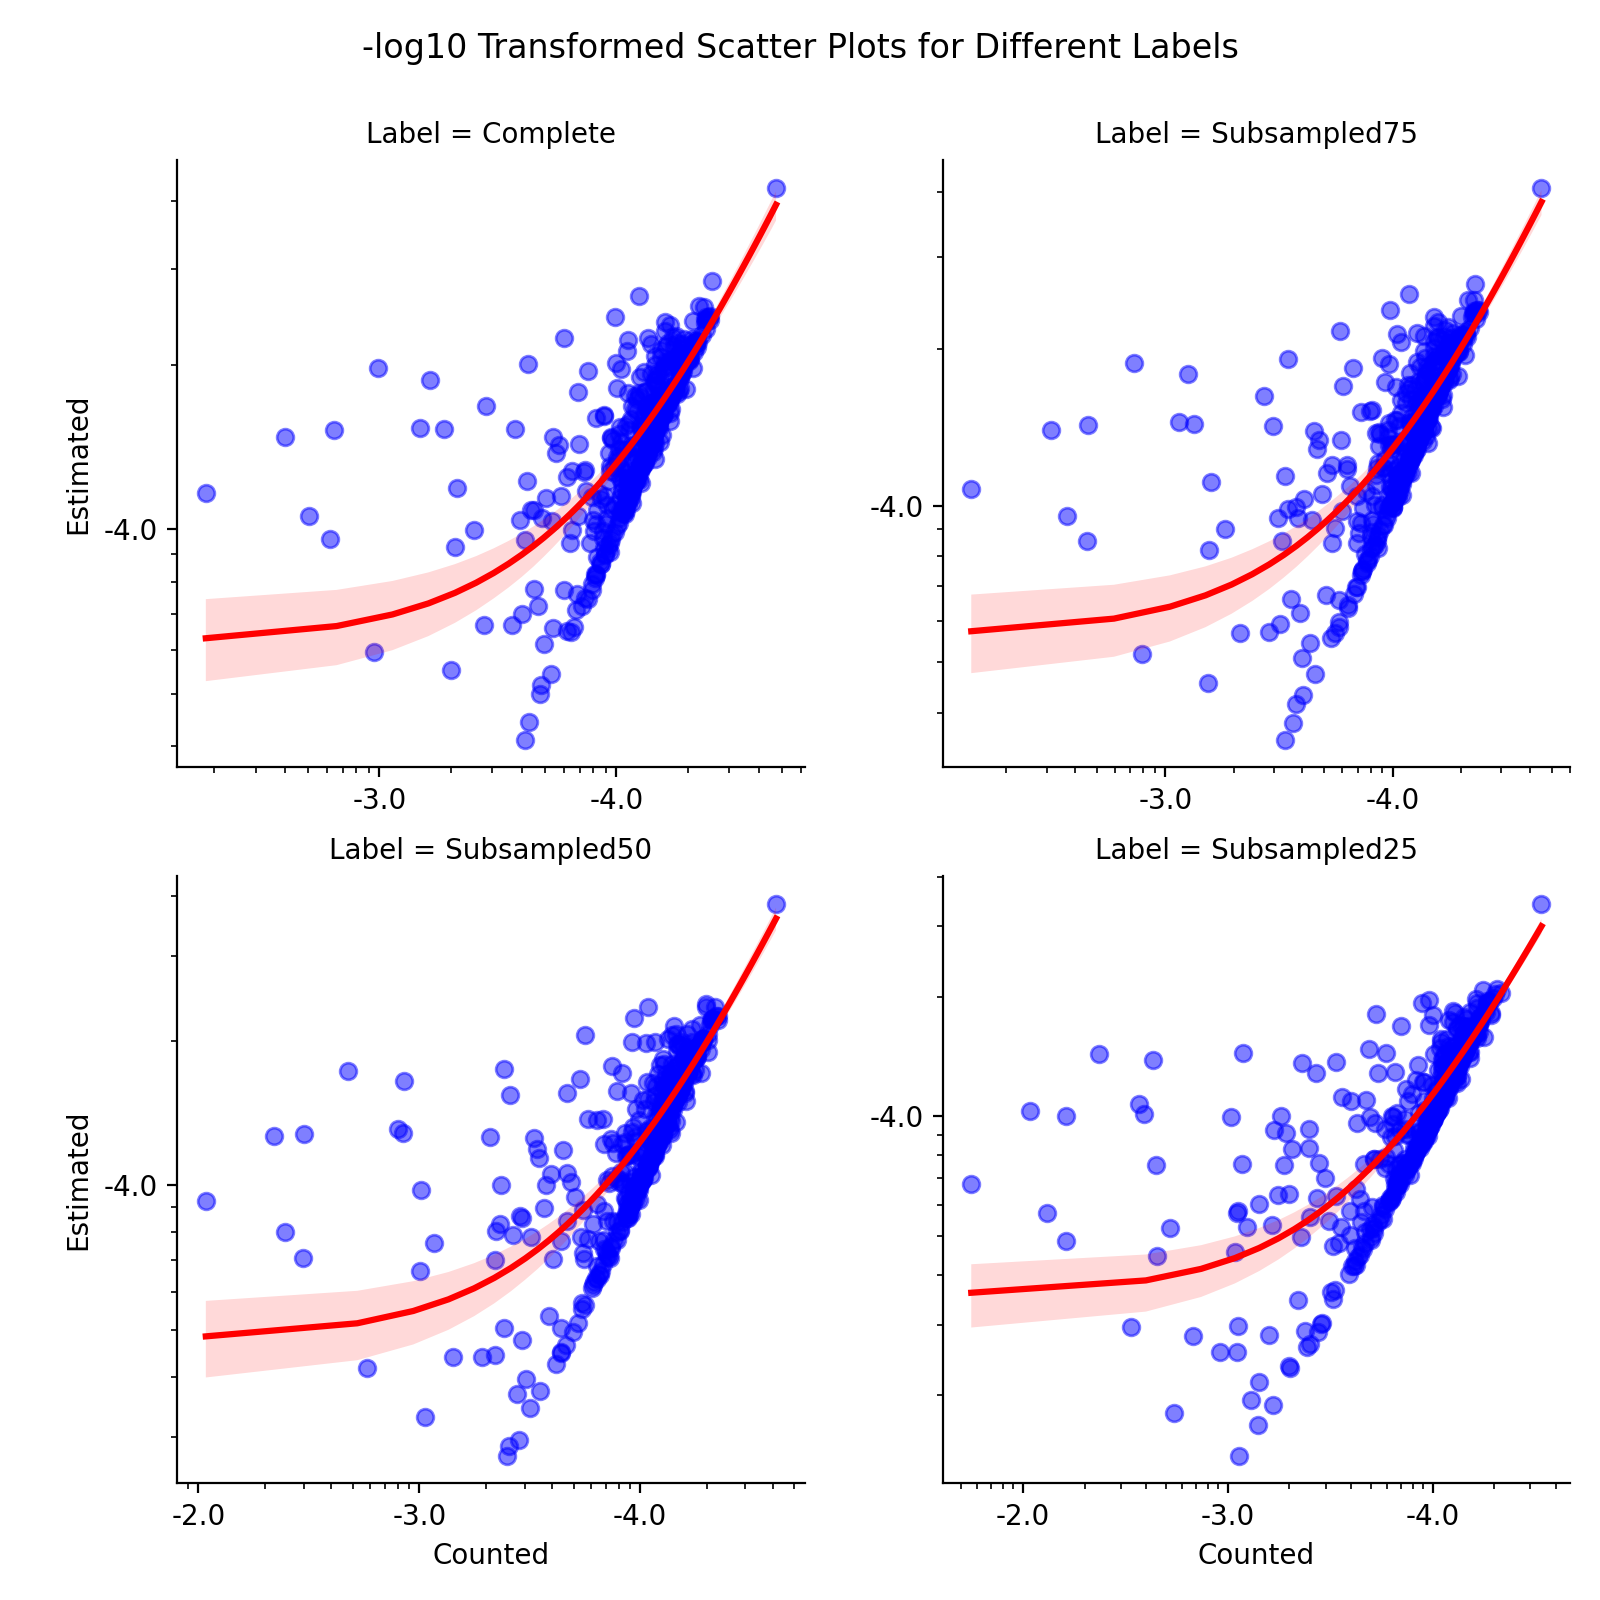

In [48]:
# linear regression line fitted to the scatter points of 'Counted' and 'Estimated' values

# Creating a lmplot with -log10 transformation on both axes for each Label
g = sns.lmplot(x='Counted', y='Estimated', data=df, col='Label', sharex=False, sharey=False,
               col_wrap=2, height=4, aspect=1, scatter_kws={'color': 'blue', 'alpha': 0.5},
               line_kws={'color': 'red'})

# Adjusting the axes to -log10 scale
g = g.set(xscale='log', yscale='log')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('-log10 Transformed Scatter Plots for Different Labels')

# Setting the ticks to represent -log10 values
for ax in g.axes.flatten():
    ax.set_xticklabels(neg_log10(ax.get_xticks()))
    ax.set_yticklabels(neg_log10(ax.get_yticks()))

plt.show()


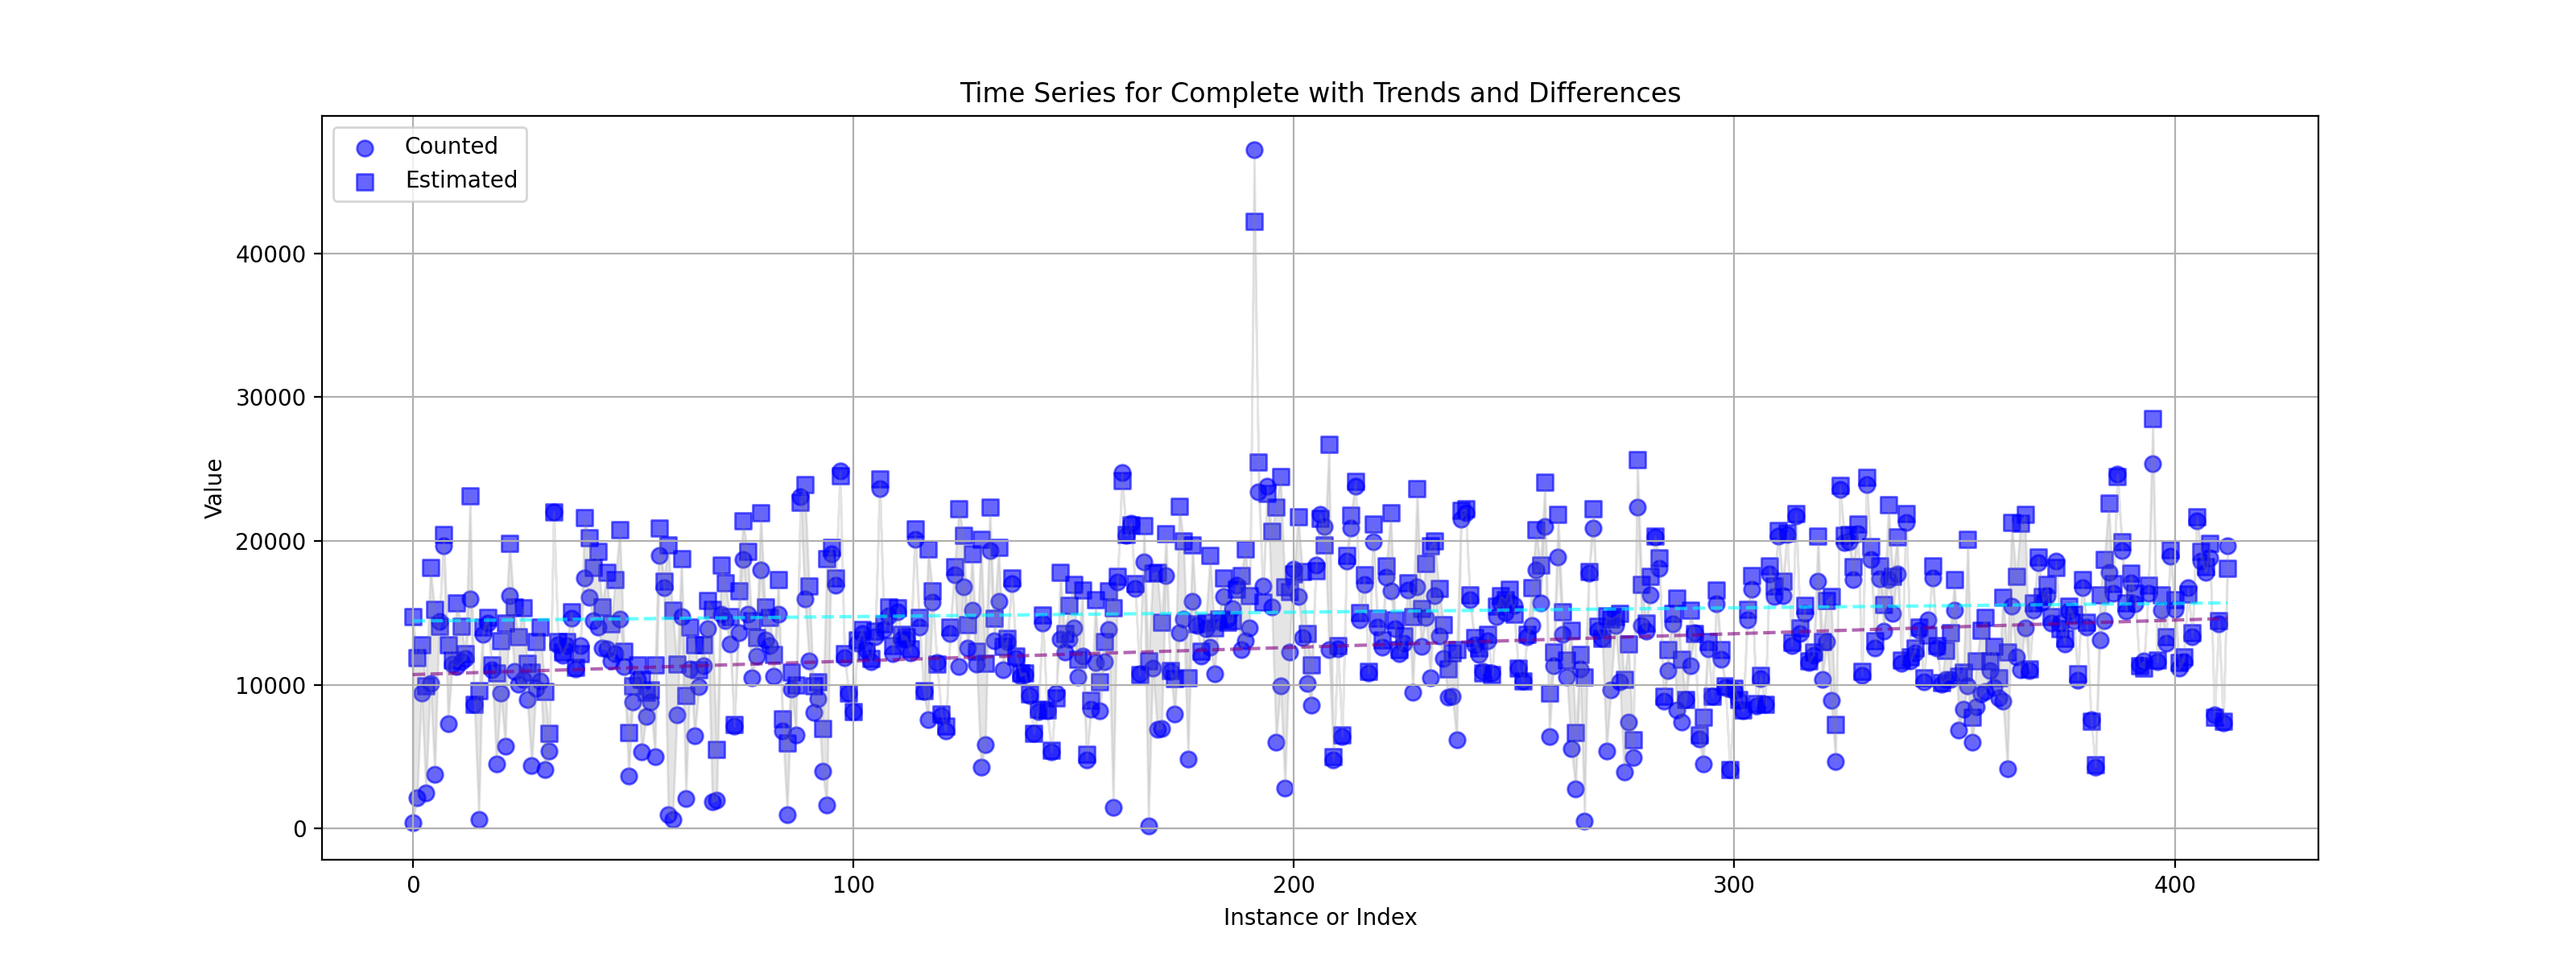

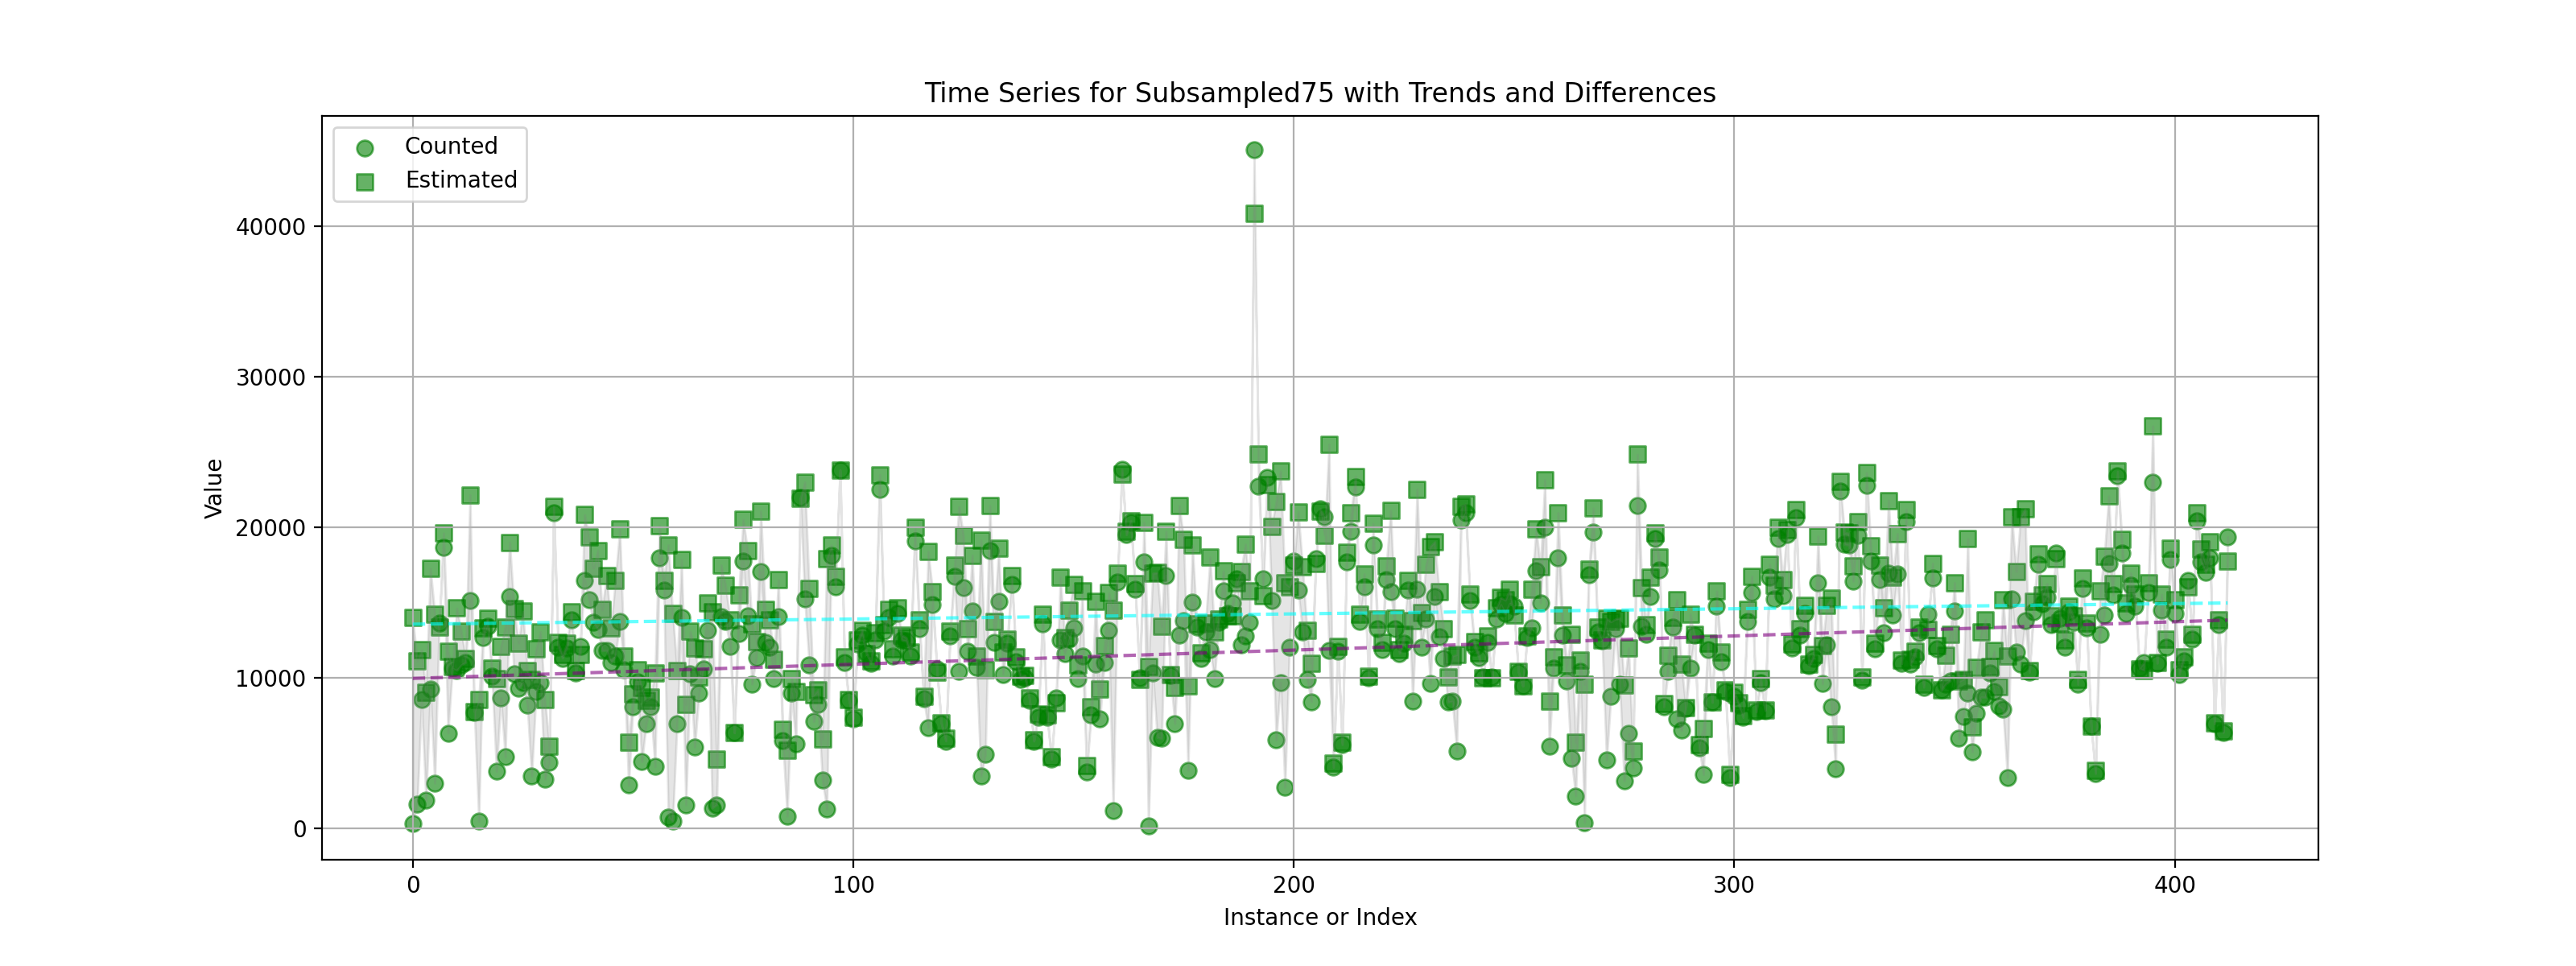

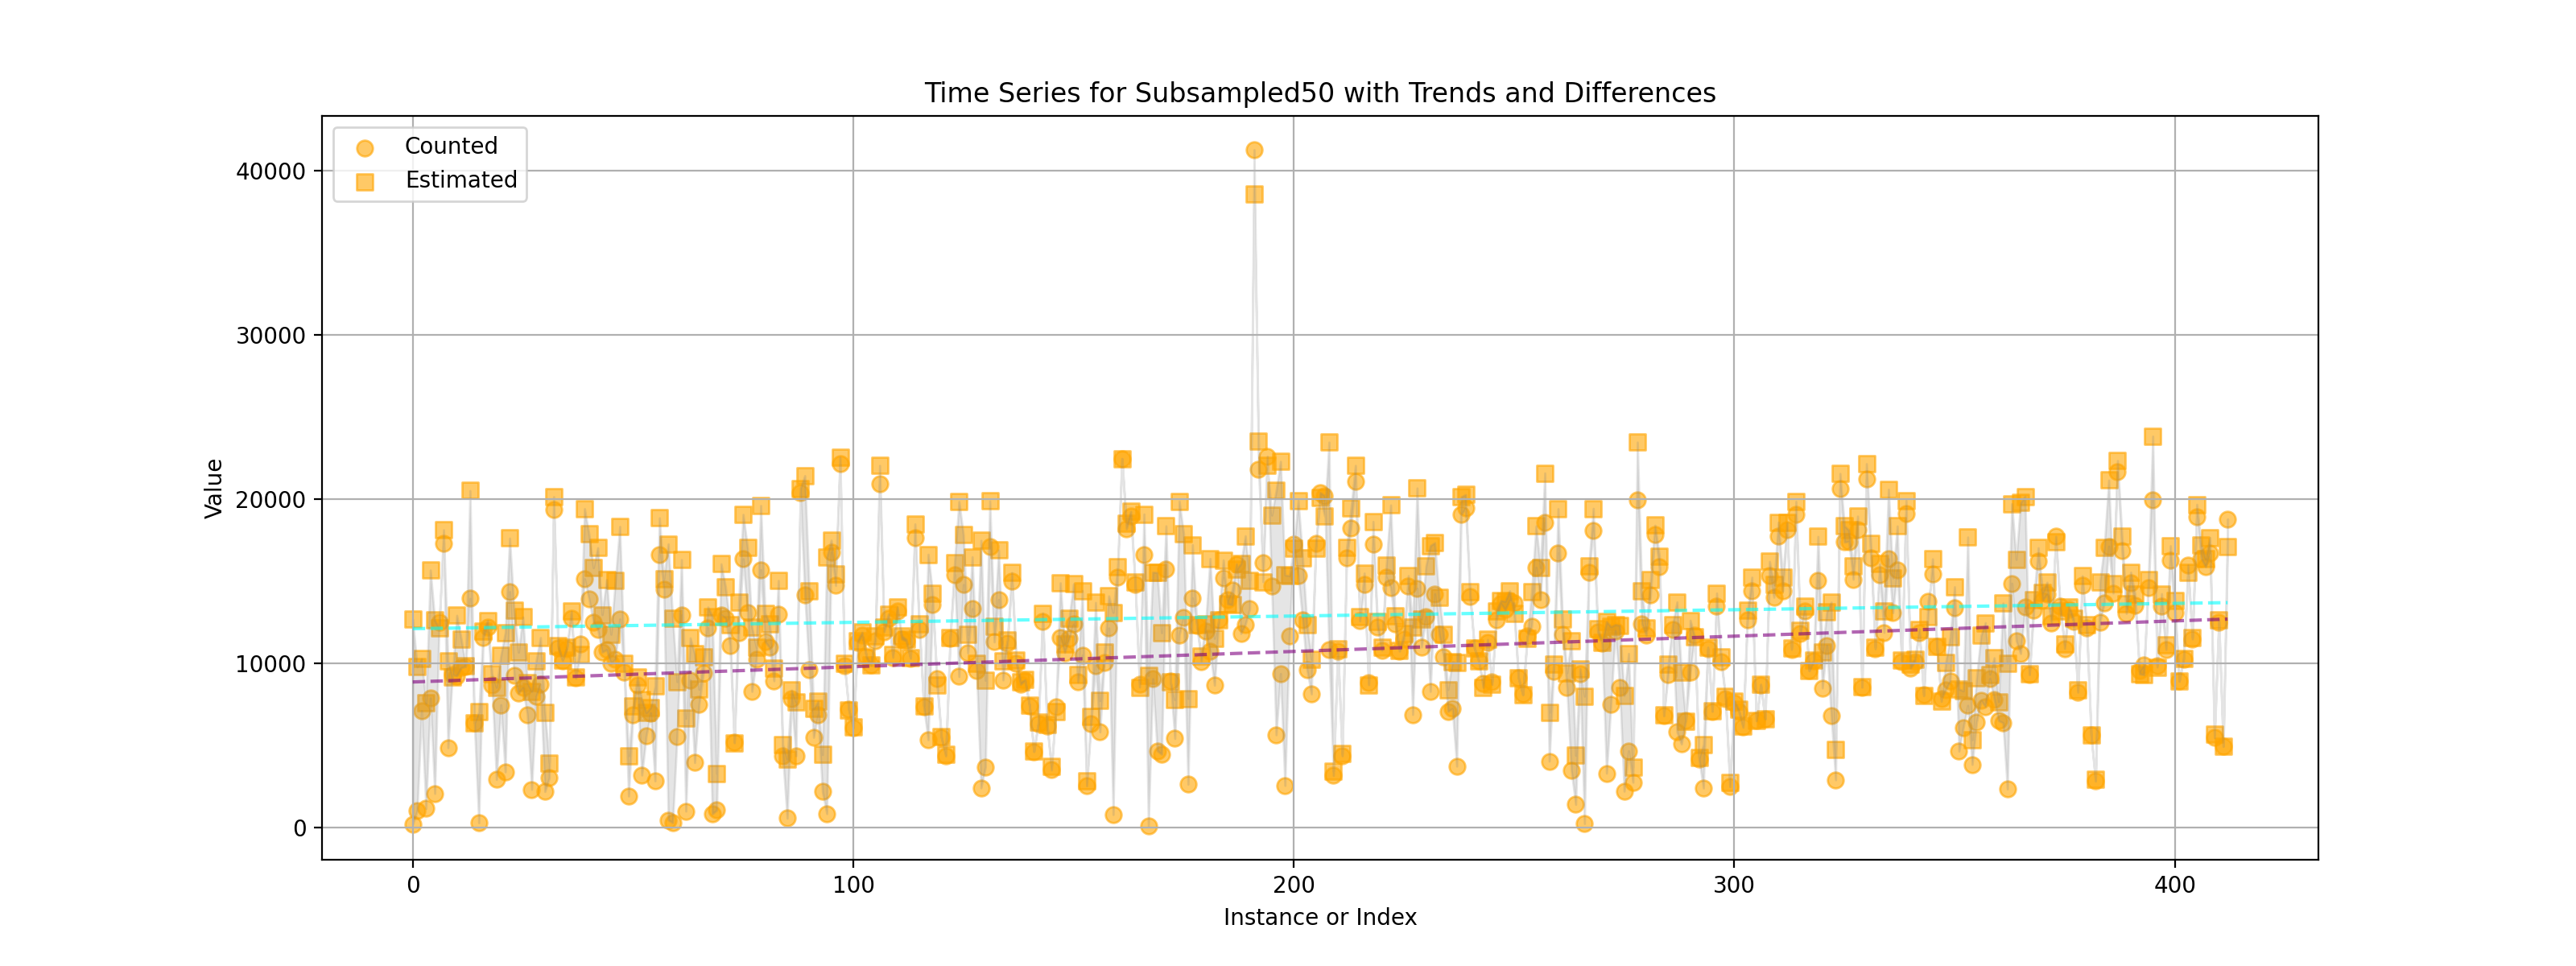

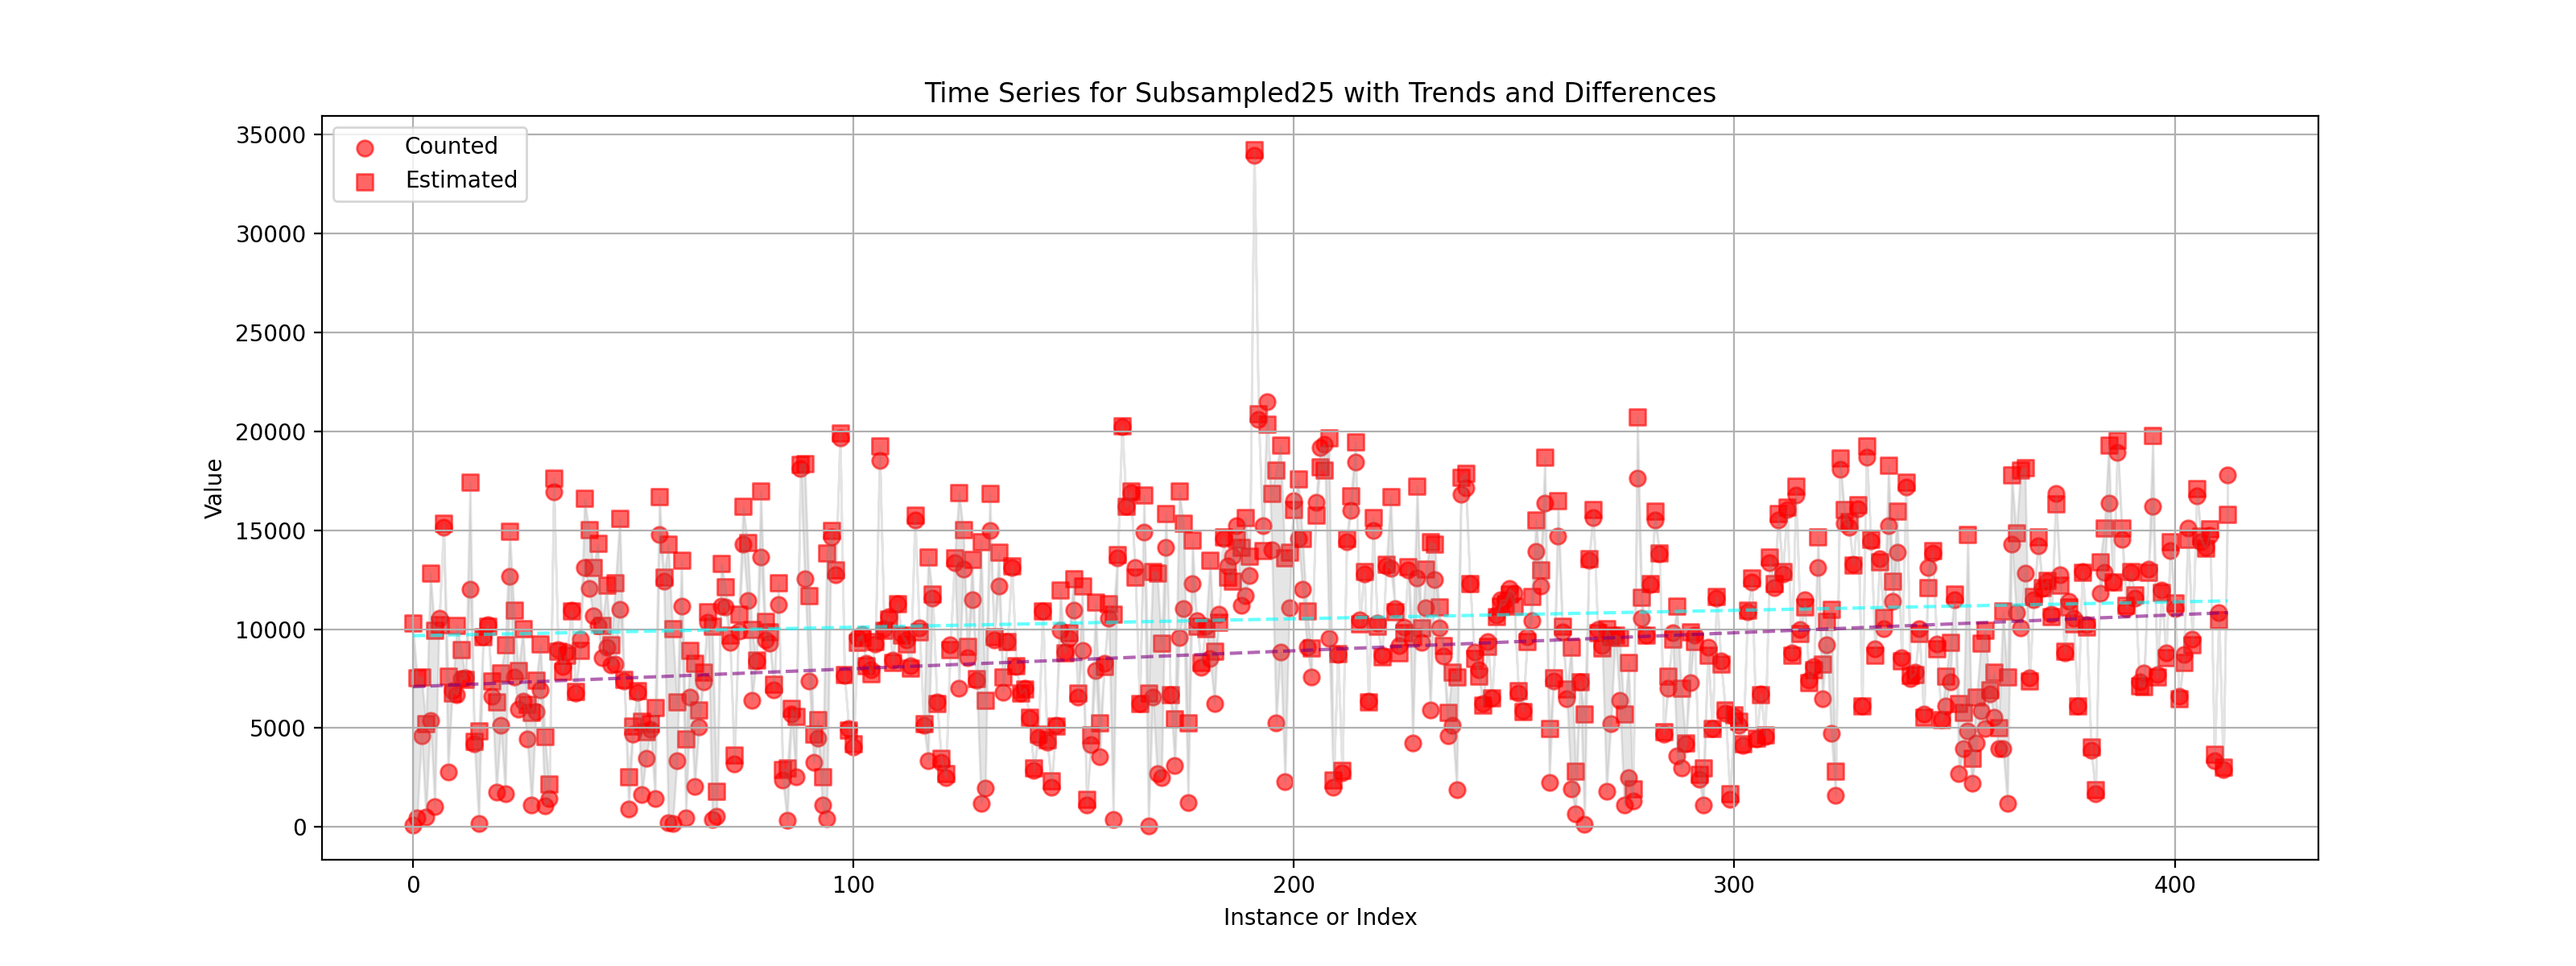

In [49]:
# purple dashed (predicted): linear regression lines fitted to 'Time' vs 'Counted'
# cyan dashed (estimated)  : linear regression lines fitted to 'Time' vs 'Estimated' 


# Define a color for each label
color_dict = {
    "Complete": "blue",
    "Subsampled75": "green",
    "Subsampled50": "orange",
    "Subsampled25": "red",
}

for label in labels:
    subset = df[df['Label'] == label]
    plt.figure(figsize=(16, 6))

    # Scatter Plot for clarity
    plt.scatter(subset['Time'], subset['Counted'], color=color_dict[label], label='Counted', marker='o', s=50, alpha=0.6)
    plt.scatter(subset['Time'], subset['Estimated'], color=color_dict[label], label='Estimated', marker='s', s=50, alpha=0.6)
    
    # Linear Regression and Line
    model_counted = LinearRegression().fit(subset[['Time']], subset['Counted'])
    predicted_counted = model_counted.predict(subset[['Time']])
    plt.plot(subset['Time'], predicted_counted, color='purple', linestyle='dashed', alpha=0.6)

    model_estimated = LinearRegression().fit(subset[['Time']], subset['Estimated'])
    predicted_estimated = model_estimated.predict(subset[['Time']])
    plt.plot(subset['Time'], predicted_estimated, color='cyan', linestyle='dashed', alpha=0.6)

    # Shading Between Lines
    plt.fill_between(subset['Time'], subset['Counted'], subset['Estimated'], color='gray', alpha=0.2)

    plt.title(f'Time Series for {label} with Trends and Differences')
    plt.xlabel('Instance or Index')
    plt.ylabel('Value')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()


In [50]:
# Assuming df is your DataFrame and it has a 'Label' column to group by
grouped = df.groupby('Label')
for name, group in grouped:
    print(f"{name} has {len(group)} data points")

Complete has 413 data points
Subsampled25 has 413 data points
Subsampled50 has 413 data points
Subsampled75 has 413 data points


In [51]:
## Summary statistics for "complete", "subsampled75", "subsampled50" and "subsampled25" 

data = []

# Parse the input data
for i, line in enumerate(data_str.strip().split('\n')):
    parts = line.replace(',', '').split()
    if len(parts) != 2:
        print(f"Unexpected number of values on line {i+1}: {line}")
        continue
    counted, estimated = map(int, parts)
    label = labels[i % 4]
    instance = i // 4
    percentage_difference = abs(counted - estimated) / counted * 100 if counted != 0 else 0
    data.append((instance, counted, estimated, percentage_difference, label))

# Create a DataFrame
df = pd.DataFrame(data, columns=['Instance', 'Counted', 'Estimated', 'Percentage Difference', 'Label'])

# Analyzing the differences for each time series
for label in labels:
    print(f"Statistics for {label}:")
    subset = df[df['Label'] == label]
    description = subset['Percentage Difference'].describe()
    print(description)
    print("="*40)

Statistics for Complete:
count     413.000000
mean       76.748705
std       406.205051
min         0.009079
25%         2.334484
50%         6.194159
75%        30.458762
max      6193.513514
Name: Percentage Difference, dtype: float64
Statistics for Subsampled75:
count     413.000000
mean       92.337400
std       502.014504
min         0.077502
25%         3.043536
50%         7.154898
75%        31.208573
max      7568.571429
Name: Percentage Difference, dtype: float64
Statistics for Subsampled50:
count     413.000000
mean      113.792600
std       613.922600
min         0.018287
25%         2.293767
50%         5.942902
75%        30.047307
max      8483.333333
Name: Percentage Difference, dtype: float64
Statistics for Subsampled25:
count      413.000000
mean       168.462398
std        927.265546
min          0.006173
25%          1.672176
50%          4.883963
75%         26.919935
max      11989.285714
Name: Percentage Difference, dtype: float64


In [56]:
number_complete_instances = len(df[(df['Label'] == 'Complete')])
number_complete_5percent  = len(df[(df['Label'] == 'Complete') & (df['Percentage Difference'] < 5)])
print(f"number of complete instances {number_complete_instances}")
print(f"number of complete instances with deviation less than 5%: {number_complete_5percent}/{number_complete_instances} = {(number_complete_5percent/number_complete_instances)*100:.2f}%")

number of complete instances 413
number of complete instances with deviation less than 5%: 191/413 = 46.25%


In [53]:
df[(df['Label'] == 'Complete') & (df['Percentage Difference'] > 90)]

Instance  Counted  Estimated  Percentage Difference     Label
24           6    14378      14056               2.239533  Complete
28           7    19664      20428               3.885273  Complete
36           9    11461      11706               2.137684  Complete
48          12    11814      12164               2.962587  Complete
56          14     8640       8618               0.254630  Complete
...        ...      ...        ...                    ...       ...
1624       406    18608      19256               3.482373  Complete
1628       407    17825      18201               2.109397  Complete
1636       409     7911       7738               2.186828  Complete
1640       410    14242      14484               1.699200  Complete
1644       411     7365       7477               1.520706  Complete

[191 rows x 5 columns]

In [54]:
## Just for checking whether the acquired data is correctly parsed

# Parse the input data
for i, line in enumerate(data_str.strip().split('\n')):
    parts = line.replace(',', '').split()
    if len(parts) != 2:
        print(f"Unexpected number of values on line {i+1}: {line}")
        continue
    counted, estimated = map(int, parts)
    label = labels[i % 4]
    instance = i // 4
    print(f"{label}: {counted} {estimated}")

Complete: 400 14755
Subsampled75: 315 13975
Subsampled50: 220 12685
Subsampled25: 108 10315
Complete: 2128 11882
Subsampled75: 1583 11080
Subsampled50: 1023 9791
Subsampled25: 446 7536
Complete: 9429 12791
Subsampled75: 8540 11826
Subsampled50: 7117 10278
Subsampled25: 4623 7578
Complete: 2501 9952
Subsampled75: 1825 9028
Subsampled50: 1165 7583
Subsampled25: 523 5234
Complete: 10080 18163
Subsampled75: 9207 17236
Subsampled50: 7890 15686
Subsampled25: 5392 12842
Complete: 3745 15234
Subsampled75: 2983 14227
Subsampled50: 2085 12631
Subsampled25: 1038 9947
Complete: 14378 14056
Subsampled75: 13620 13332
Subsampled50: 12507 12160
Subsampled25: 10549 10230
Complete: 19664 20428
Subsampled75: 18631 19587
Subsampled50: 17303 18132
Subsampled25: 15146 15343
Complete: 7278 12755
Subsampled75: 6311 11744
Subsampled50: 4868 10160
Subsampled25: 2792 7639
Complete: 11461 11706
Subsampled75: 10603 10721
Subsampled50: 9311 9176
Subsampled25: 6892 6768
Complete: 11262 15670
Subsampled75: 10467 1460